# Термоэлектронный диод
### Лабораторная работа 

**Карташов Константин Б04-005**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [2]:
# функция мнк

def lsf(x, y, functional=True):
    x_avg = np.average(x)
    y_avg = np.average(y)
    xy_avg = np.average(x * y)
    x2_avg = np.average(np.square(x))
    y2_avg = np.average(np.square(y))
    count = len(x)
    
    print('x=', x_avg, 'y=', y_avg)
    print('x2=', x2_avg, 'y2=', y2_avg, 'xy=', xy_avg)
    
    b = (xy_avg - x_avg * y_avg) / (x2_avg - x_avg ** 2)
    b_error = ((y2_avg - y_avg ** 2)/(x2_avg - x_avg ** 2) - b ** 2) ** 0.5 / count ** 0.5
    a = y_avg - b * x_avg
    a_error = b_error * (x2_avg - x_avg ** 2) ** 0.5
    
    if functional:
        f = lambda x: b * x + a
        return f, (b, a, b_error, a_error)
    
    return b, a, b_error, a_error

In [3]:
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
# rcParams

Измеренные значения для $I_\text{нак}$ и $U_\text{нак}$

In [4]:
I_nak = np.arange(0.1, 3.2, 0.1)
U_nak = np.array([22, 44.6, 69.2, 100.8, 143.1, 202, 278, 378, 483, 602, 693, 835, 1018, 1141, 1283, 1492, 1586, 2170, 2320, 2760, 2820, 3180, 3490, 3710, 4000, 4320, 4790, 5160, 5370, 5750, 6170])
I_nak, U_nak

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
        2.7, 2.8, 2.9, 3. , 3.1]),
 array([  22. ,   44.6,   69.2,  100.8,  143.1,  202. ,  278. ,  378. ,
         483. ,  602. ,  693. ,  835. , 1018. , 1141. , 1283. , 1492. ,
        1586. , 2170. , 2320. , 2760. , 2820. , 3180. , 3490. , 3710. ,
        4000. , 4320. , 4790. , 5160. , 5370. , 5750. , 6170. ]))

## График зависимоти $I_\text{нак} ( U_\text{нак} ) $

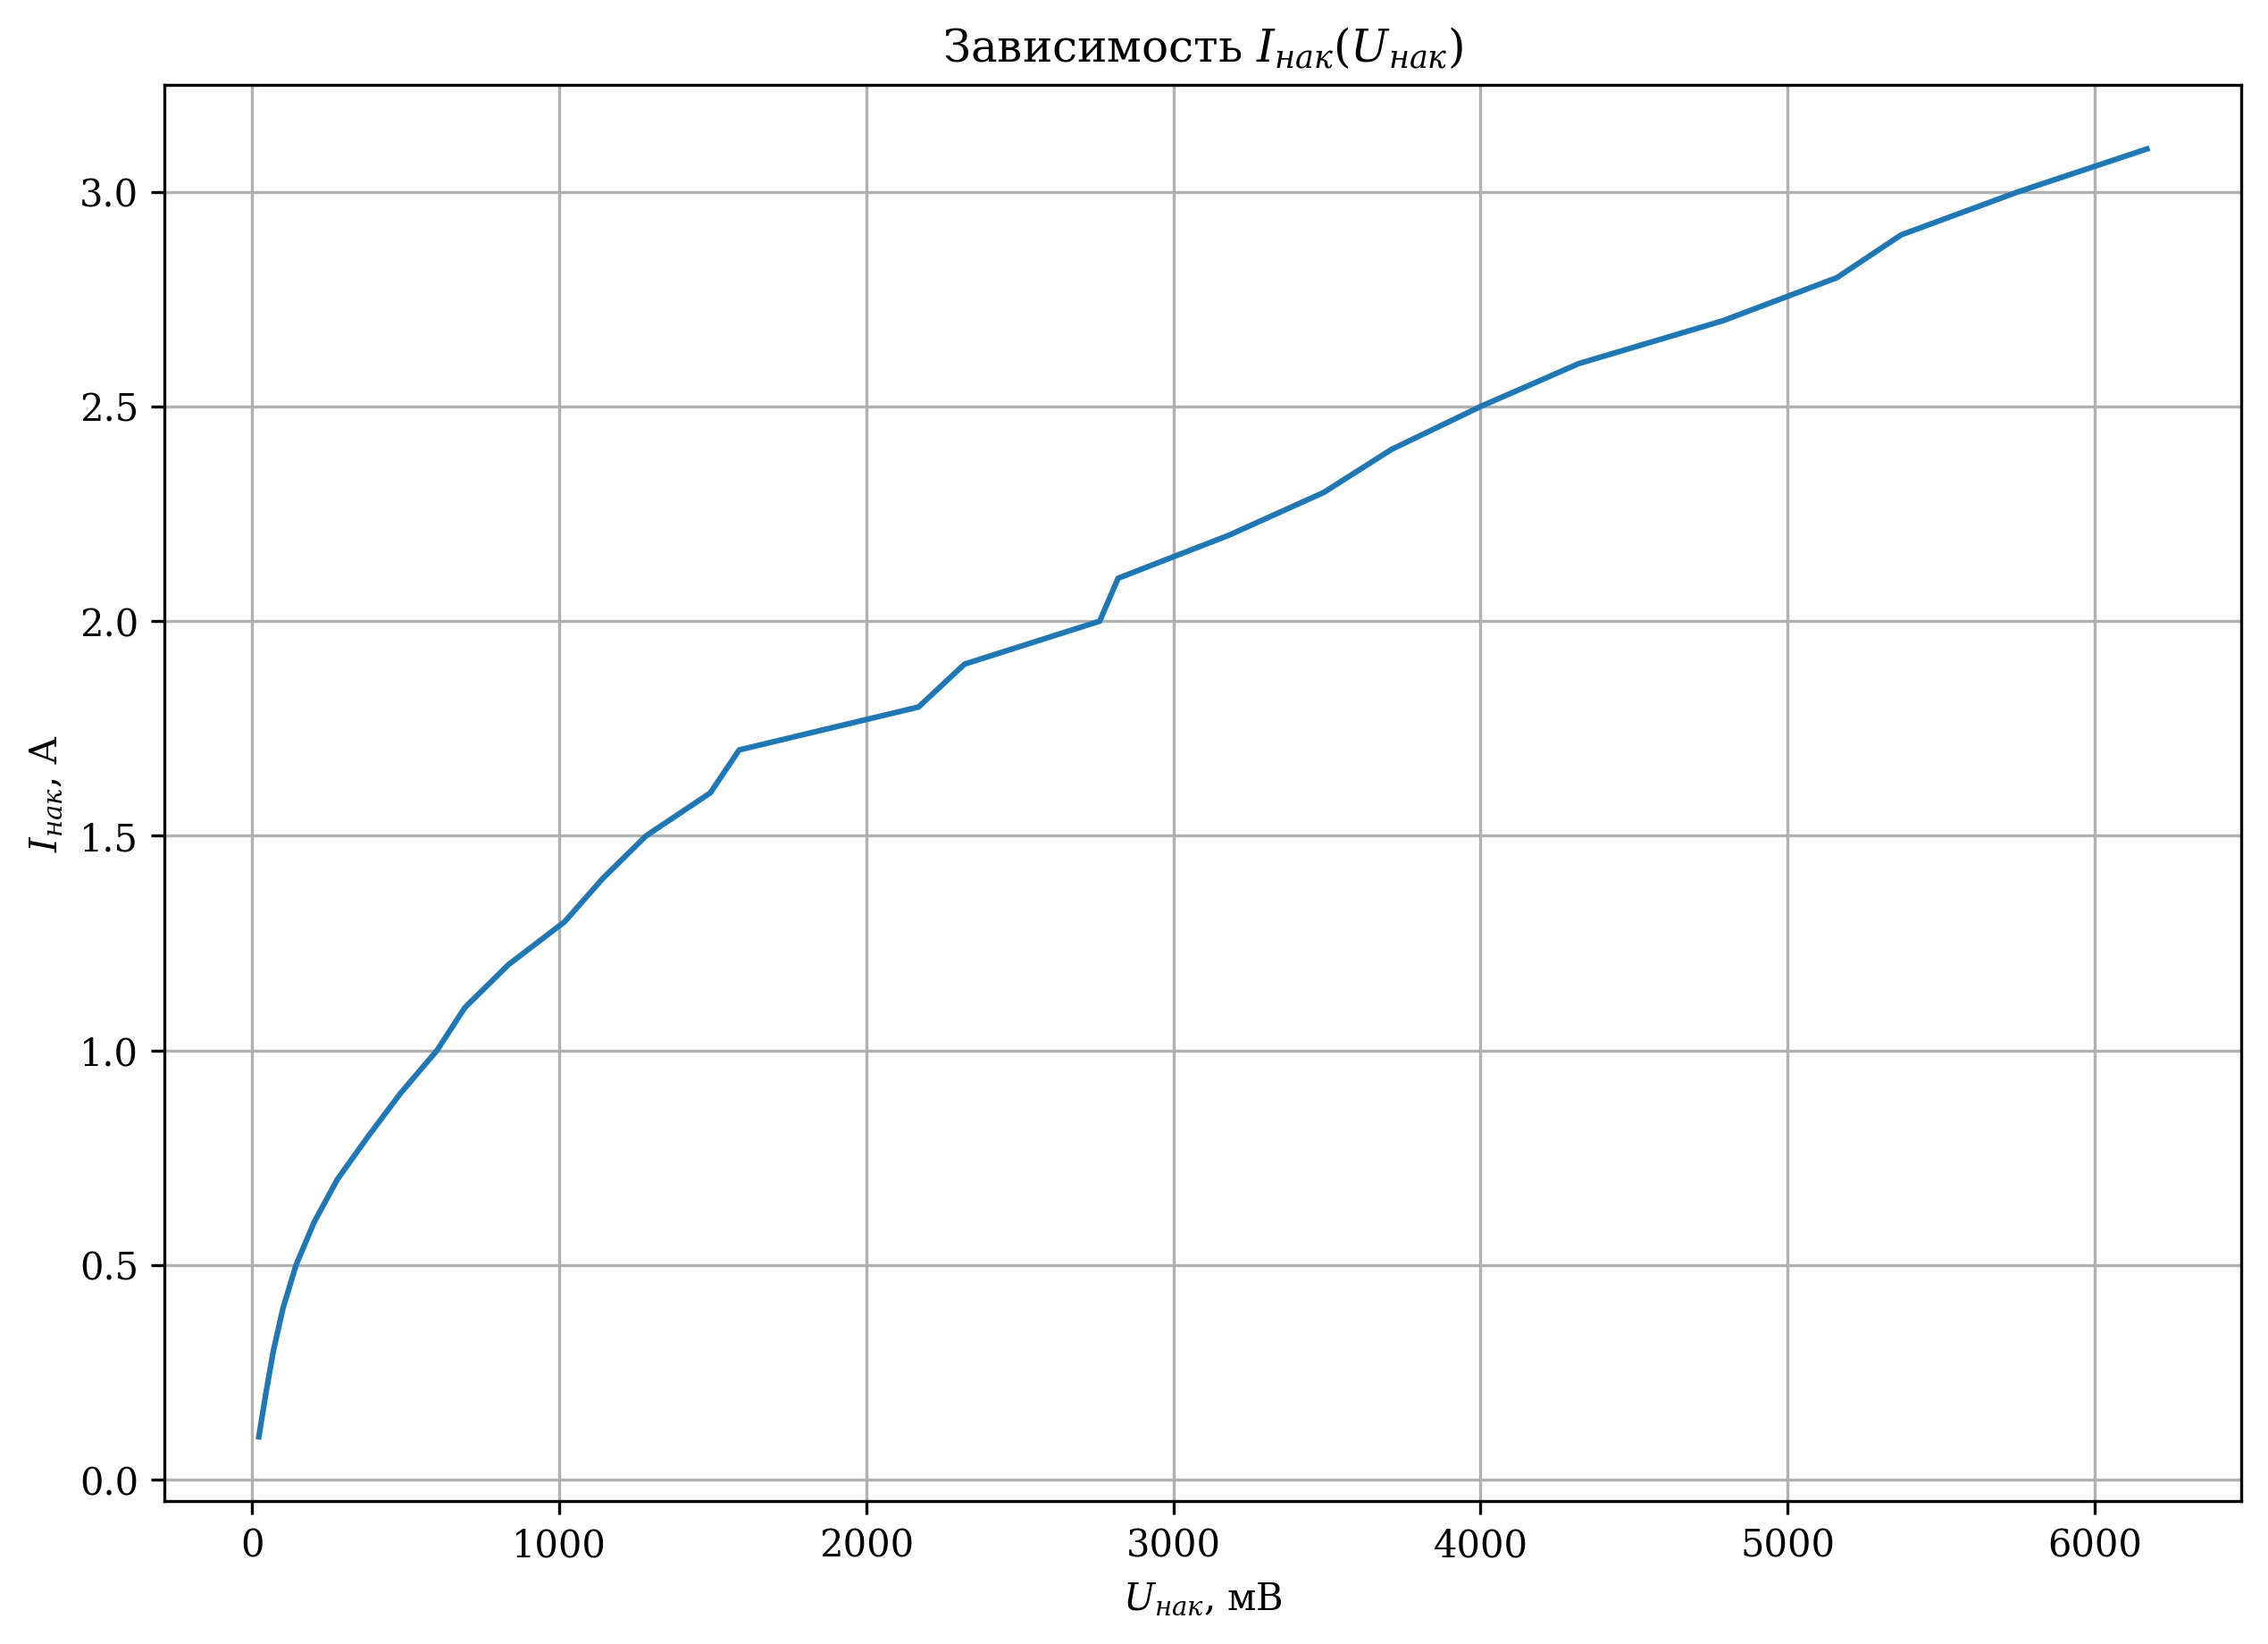

In [5]:
plt.title("Зависимость $I_{нак} ( U_{нак} ) $")
plt.ylabel("$I_{нак}$, А")
plt.xlabel("$U_{нак}$, мВ")
plt.plot(U_nak, I_nak)

plt.savefig("iu.png")

## График зависимоти $ R(P) $

$ R =  \frac{U_{нак}}{I_{нак}}, \;\; P = U_{нак} I_{нак} $

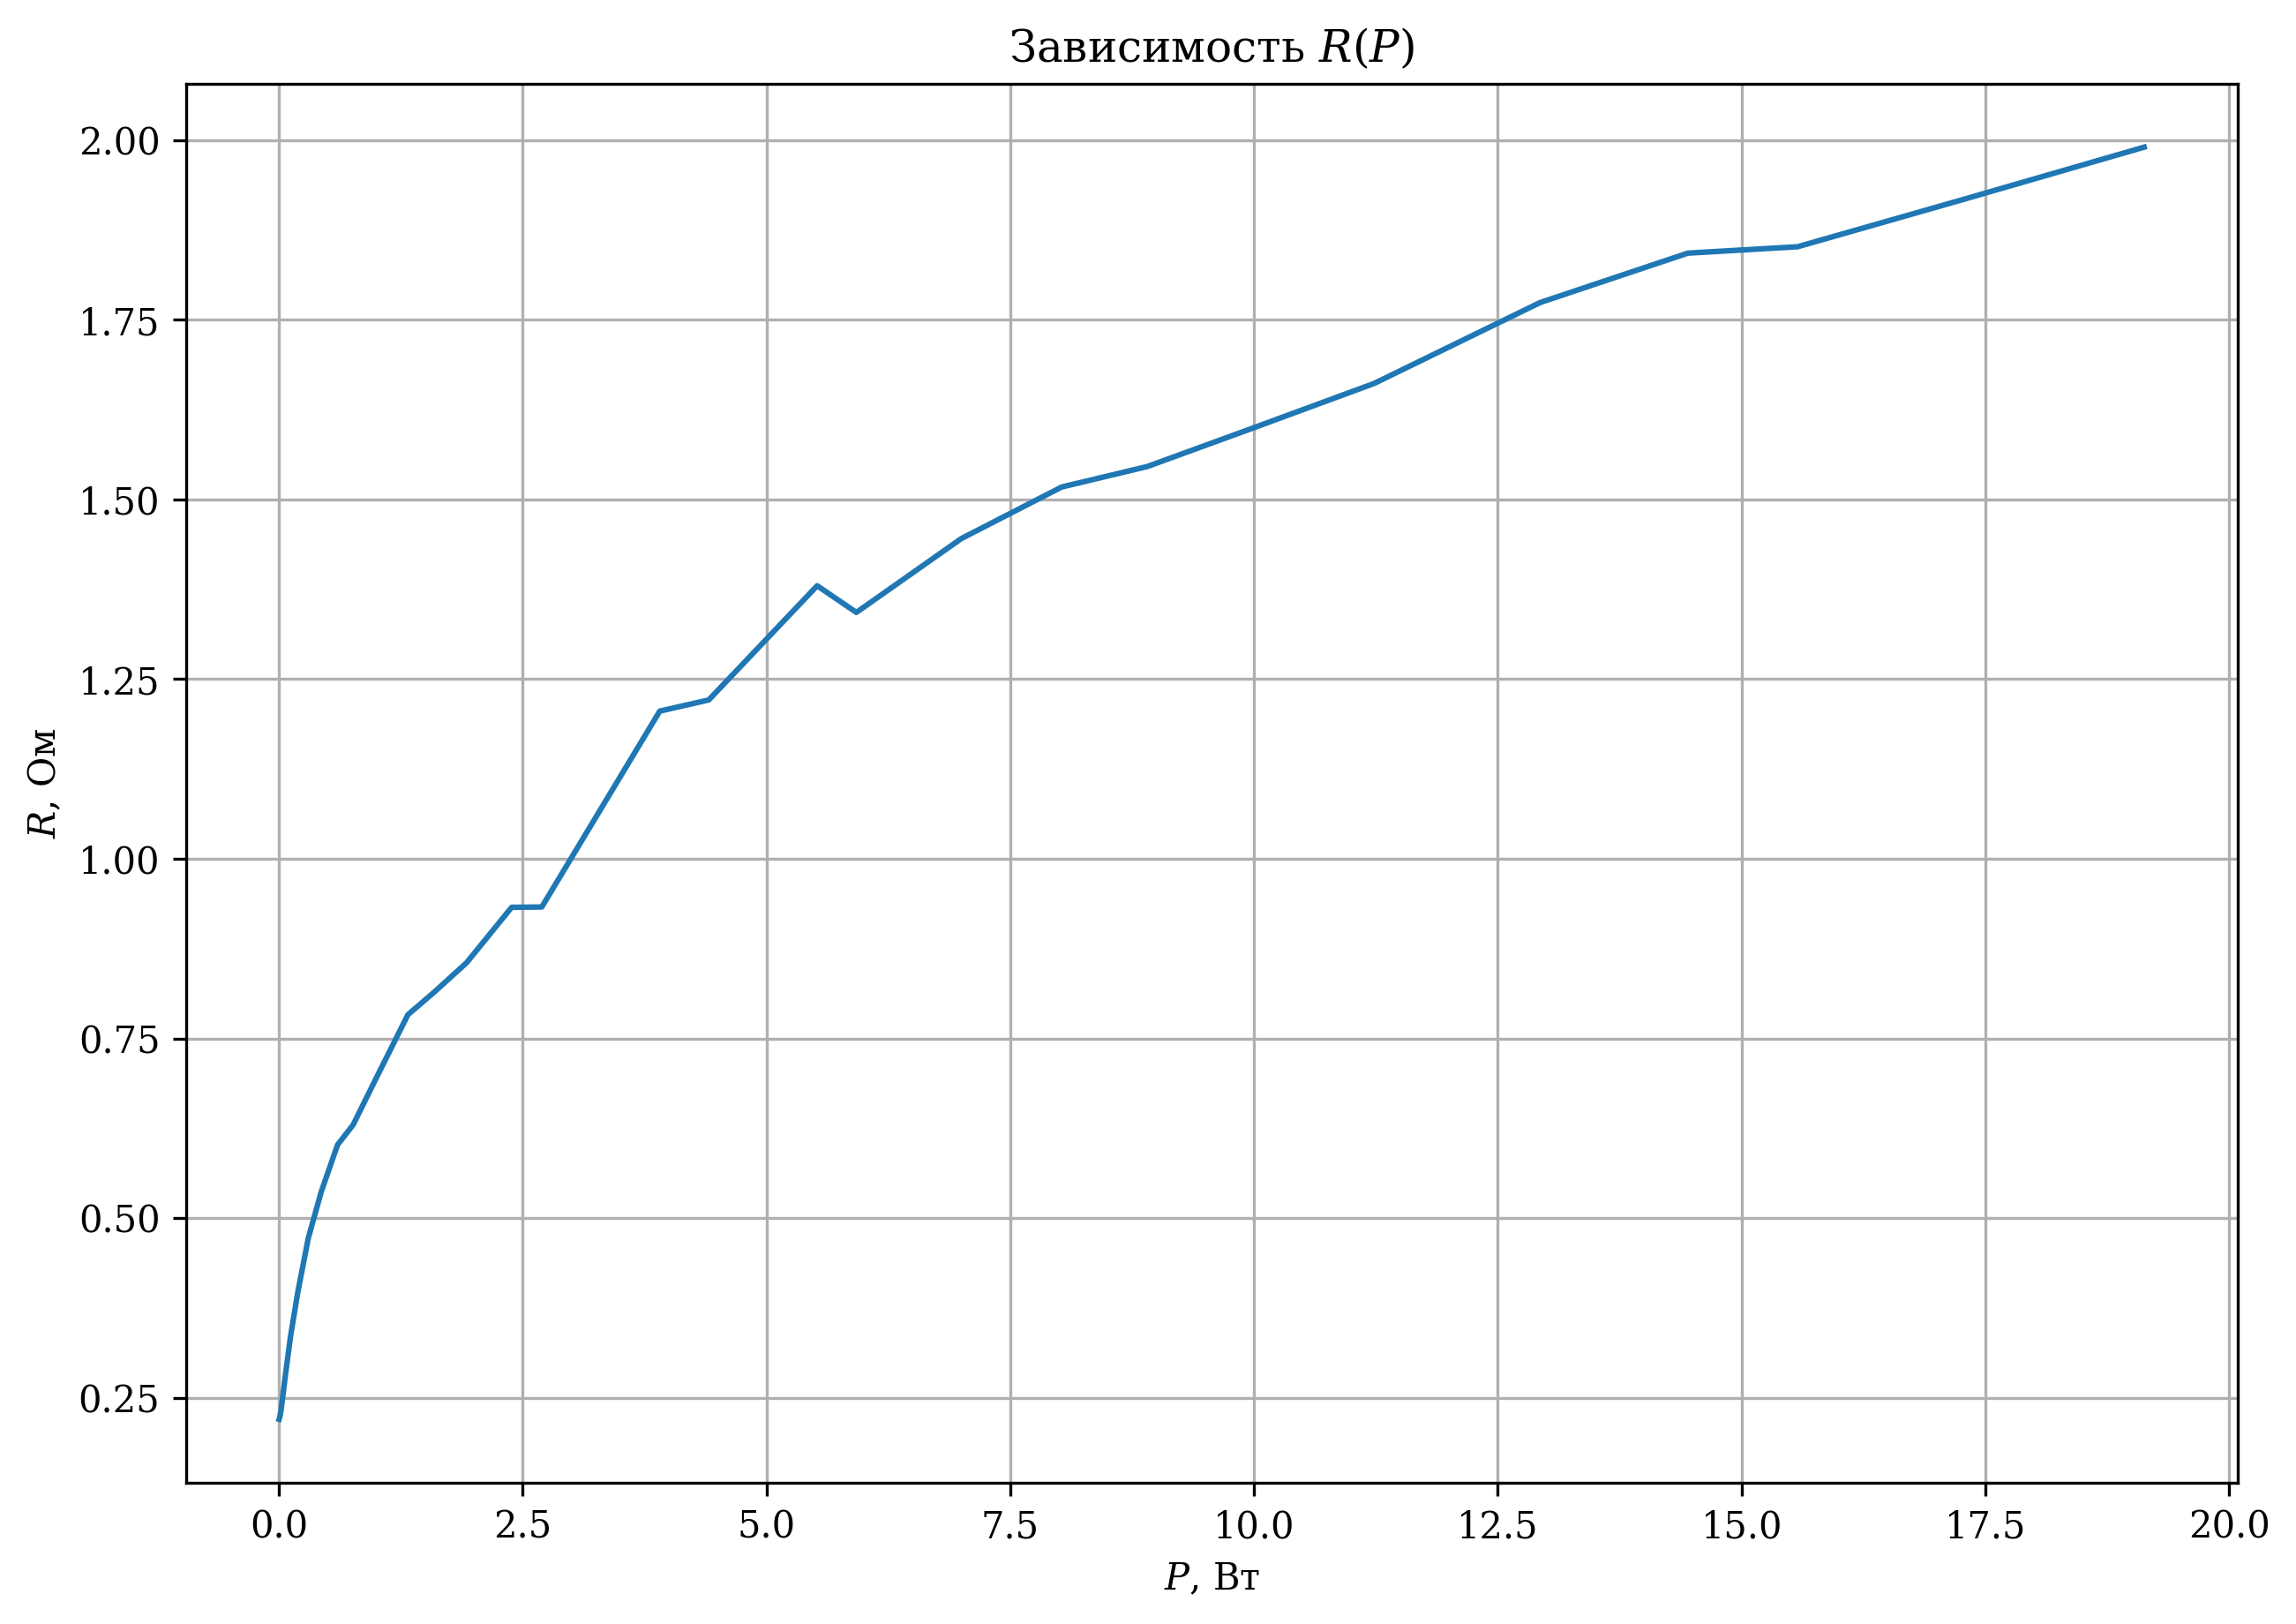

In [6]:
plt.title("Зависимость $R(P) $")
plt.ylabel("$R$, Ом")
plt.xlabel("$P$, Вт")

plt.plot( U_nak * I_nak / 1000, U_nak/I_nak / 1000)

plt.savefig("rp.png")

## Зависимоть $T(I_{нак})$

Здесь T - температура катода. Возспользуемся уравнениями:
$$\rho = \rho_0 ( 1 + \alpha T) \Rightarrow T = \frac{1}{\alpha} \left( \frac{\rho}{\rho_0} - 1 \right) = \frac{1}{\alpha} \left( \frac{ U_{нак}}{I_{нак} l_k \rho_0} - 1 \right)$$

$\rho_0 = 6.4 \cdot 10^{-6}$, Ом/см  
$\alpha = 9.29 \cdot 10^{-3}$  
$l_k = 40$, мм  
$d = 0.15$, мм  

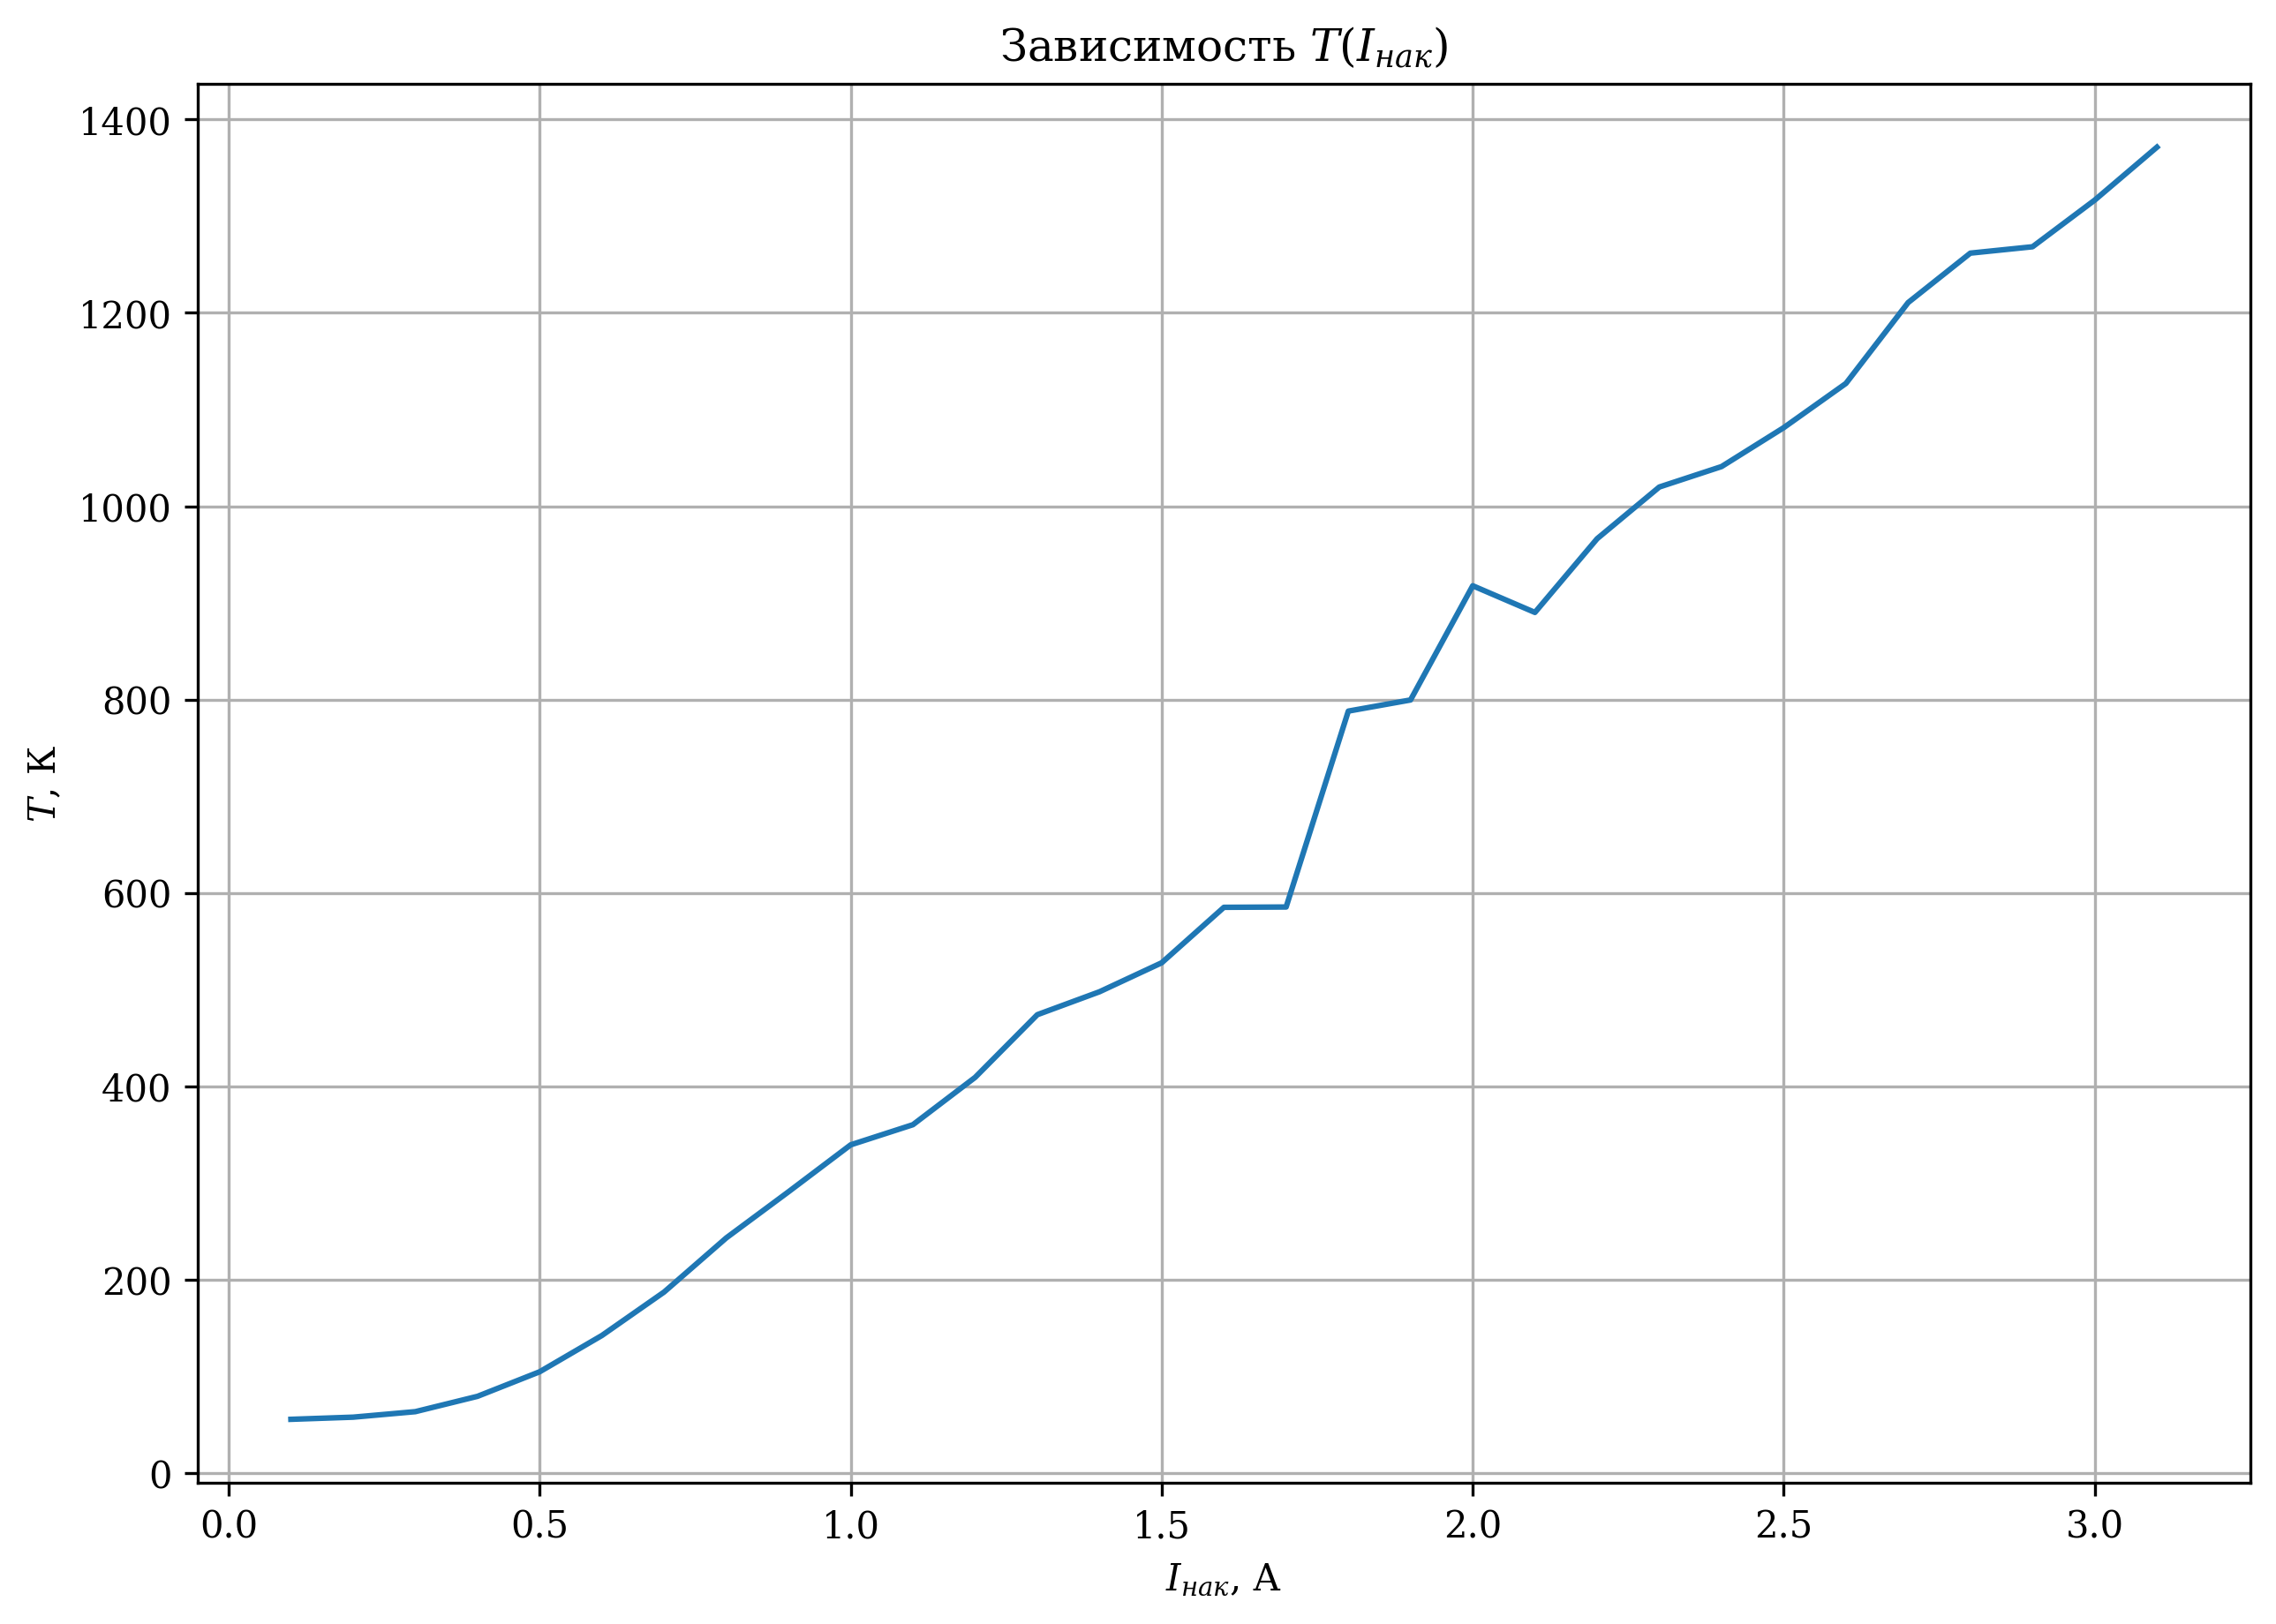

In [39]:
T = 1/(9.29e-3) * ( ( np.pi * (0.15** 2) * U_nak) / ( 4 * (40) * 6.4e-5 * I_nak * 1000 ) - 1)
plt.title(r"Зависимость $T(I_{нак})$")
plt.xlabel(r"$I_{нак}$, А")
plt.ylabel(r"$T$, К")
plt.plot(I_nak, T)

plt.savefig("ti.png")

## Зависимости андоного тока от анодного напряжения при различных значения тока и напряжения накаливания

In [9]:
plt.figure(figsize = (10, 20))

# I_nak = 2.4 U_nak = 3.71
diod1 = pd.DataFrame({
    "Ua, В" : np.append(np.arange(1, 6, 1), np.arange(10, 141, 10)),
    "Iв, мкА" : np.array([17, 30, 32, 33, 34, 36, 37, 39, 40, 41, 42, 43, 44, 44, 45, 46, 47, 47, 48])
})
diod1.iloc[:, 1] *= 1e-6
# plt.subplot(5, 1, 1)
# plt.plot(diod1.iloc[:, 0], diod1.iloc[:, 1] / 1e-3)

# I_nak = 2.5 U_nak = 3.99
diod2 = pd.DataFrame({
    "Ua, В" : np.append(np.arange(1, 6, 1), np.arange(10, 141, 10)),
    "Iв, мкА" : np.array([52, 80, 94, 99, 101, 105, 109, 112, 114, 116, 119, 120, 122, 124, 126, 127, 129, 130, 131])
})
diod2.iloc[:, 1] *= 1e-6

# plt.subplot(5, 1, 2)
# plt.plot(diod2.iloc[:, 0], diod2.iloc[:, 1] / 1e-3)

# I_nak = 2.6 U_nak = 4.33
diod3 = pd.DataFrame({
    "Ua, В" : np.append(np.arange(1, 6, 1), np.arange(10, 141, 10)),
    "Iв, мкА" : np.array([66, 249, 264, 384, 444, 502, 523, 539, 554, 564, 574, 582, 588, 596, 602, 609, 615, 622, 627])
})
diod3.iloc[:, 1] *= 1e-6

# plt.subplot(5, 1, 3)
# plt.plot(diod3.iloc[:, 0], diod3.iloc[:, 1] / 1e-3)

# I_nak = 2.7 U_nak = 4.73
diod4 = pd.DataFrame({
    "Ua, В" : np.append(np.arange(1, 6, 1), np.arange(10, 141, 10)),
    "Iв, мкА" : np.array([97, 281, 387, 557, 702, 982, 1043, 1072, 1082, 1100, 1131, 1133, 1149, 1162, 1190, 1196, 1200, 1218, 1220])
})
diod4.iloc[:, 1] *= 1e-6

# plt.subplot(5, 1, 4)
# plt.plot(diod4.iloc[:, 0], diod4.iloc[:, 1] / 1e-3)

# I_nak = 2.8 U_nak = 5.15
diod5 = pd.DataFrame({
    "Ua, В" : np.append(np.arange(1, 6, 1), np.arange(10, 141, 10)),
    "Iв, мкА" : np.array([109, 271, 378, 665, 892, 2380, 2870, 2990, 3070, 3140, 3230, 3290, 3330, 3370, 3403, 3440, 3480, 3500, 3530])
})
diod5.iloc[:, 1] *= 1e-6

# plt.subplot(5, 1, 5)
# plt.plot(diod5.iloc[:, 0], diod5.iloc[:, 1] / 1e-3)

# I_nak = 2.9 U_nak = 5.36
diod6 = pd.DataFrame({
    "Ua, В" : np.append(np.arange(1, 6, 1), np.arange(10, 141, 10)),
    "Iв, мкА" : np.array([120, 300, 440, 700, 960, 2890, 5640, 5960, 6200, 6346, 6400, 6550, 6620, 6670, 6740, 6790, 6850, 6880, 6930])
})
diod6.iloc[:, 1] *= 1e-6

# plt.subplot(5, 1, 5)
# plt.plot(diod6.iloc[:, 0], diod6.iloc[:, 1] / 1e-3)

# I_nak = 3.0 U_nak = 4.73
diod7 = pd.DataFrame({
    "Ua, В" : np.append(np.arange(1, 6, 1), np.arange(10, 141, 10)),
    "Iв, мкА" : np.array([120, 250, 470, 720, 890, 2930, 7890, 13850, 16900, 17430, 17140, 17460, 17750, 17900, 17950, 17950, 18030, 18050, 18200])
})
diod7.iloc[:, 1] *= 1e-6

# plt.subplot(5, 1, 5)
# plt.plot(diod7.iloc[:, 0], diod7.iloc[:, 1] / 1e-3)


<Figure size 3000x6000 with 0 Axes>

x= 0.5972531564093516 y= -9.523322179455837
x2= 0.5624673249102612 y2= 90.75612153352002 xy= -5.5751209928821135


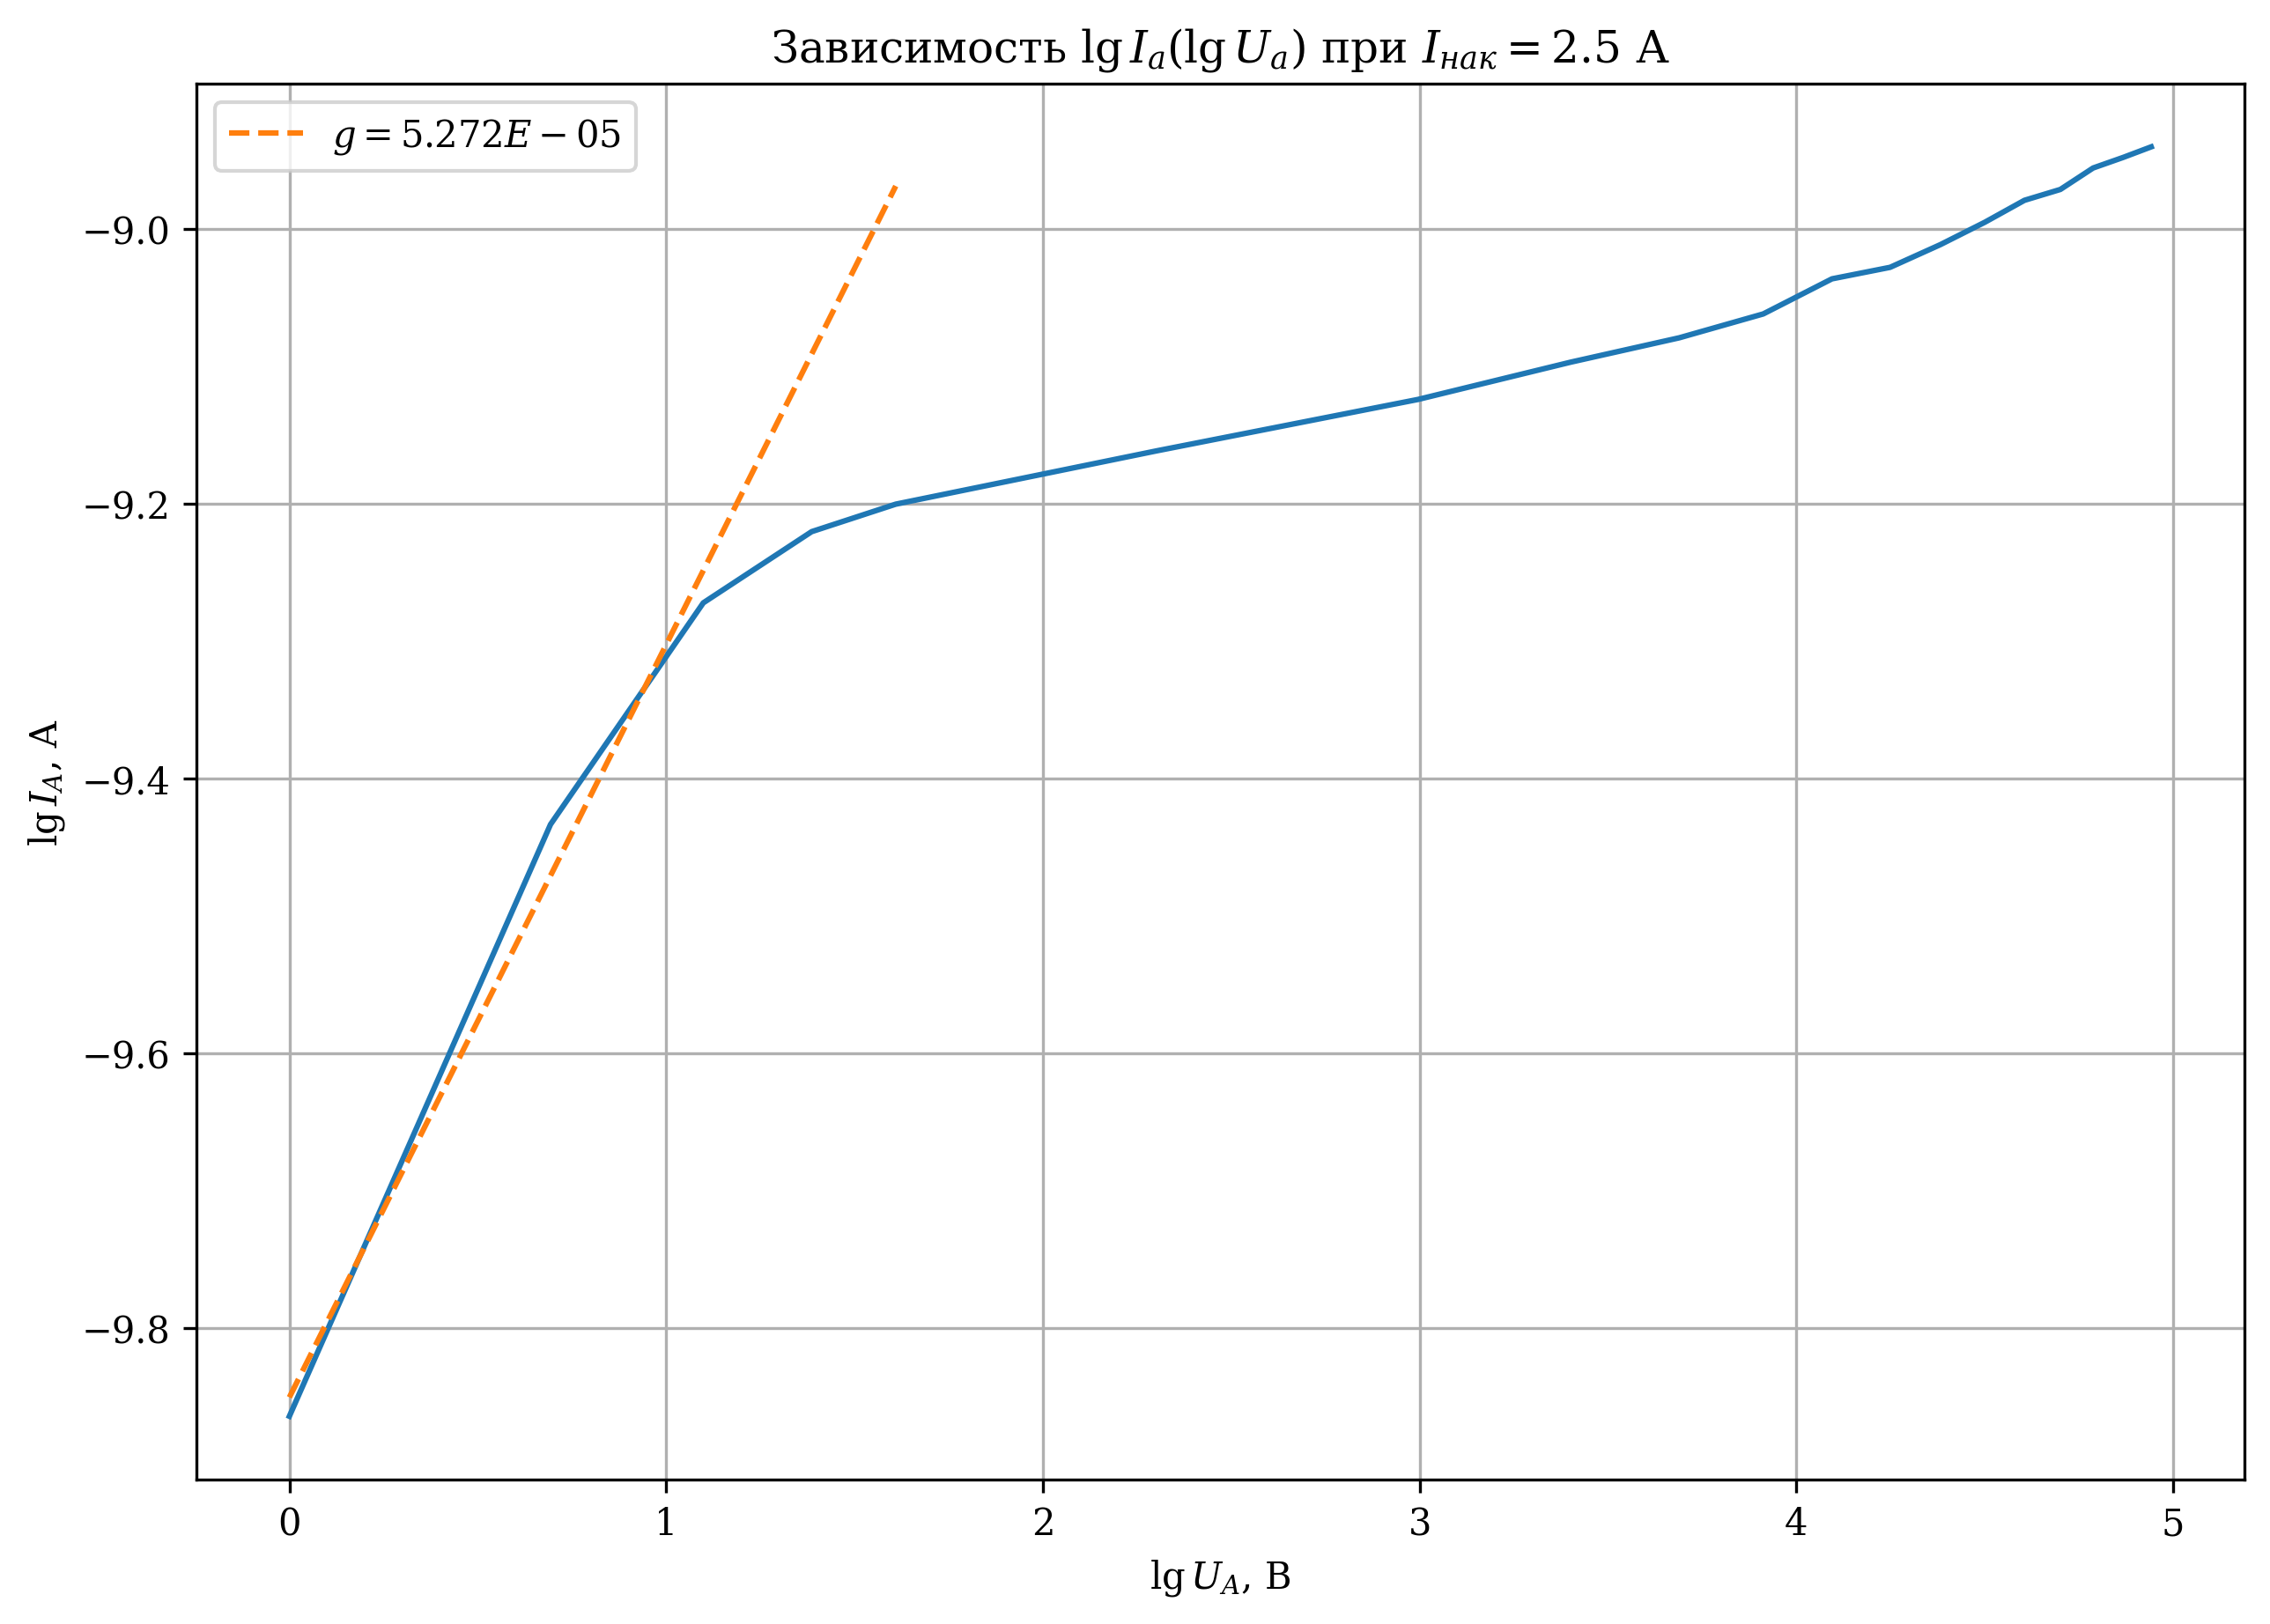

In [10]:
# I_nak = 2.5 U_nak = 3.99
plt.title(r"Зависимость $\lg I_a (\lg U_a)$ при $I_{нак} = 2.5$ А")
plt.ylabel(r"$\lgI_A$, А")
plt.xlabel(r"$\lgU_A$, В")

f, arg = lsf(np.log(diod2.iloc[:3, 0]), np.log(diod2.iloc[:3, 1]))

plt.plot(np.log(diod2.iloc[:, 0]), np.log(diod2.iloc[:, 1]))
plt.plot(np.log(diod2.iloc[:5, 0]), f(np.log(diod2.iloc[:5, 0])), ls='--', label="$g = {:.3E}$".format(np.exp(arg[1])))

plt.legend()
plt.savefig("25a.png")

x= 0.7945134575869863 y= -8.507085734407982
x2= 0.9023035076008973 y2= 72.81534571312842 xy= -6.4267202266242816


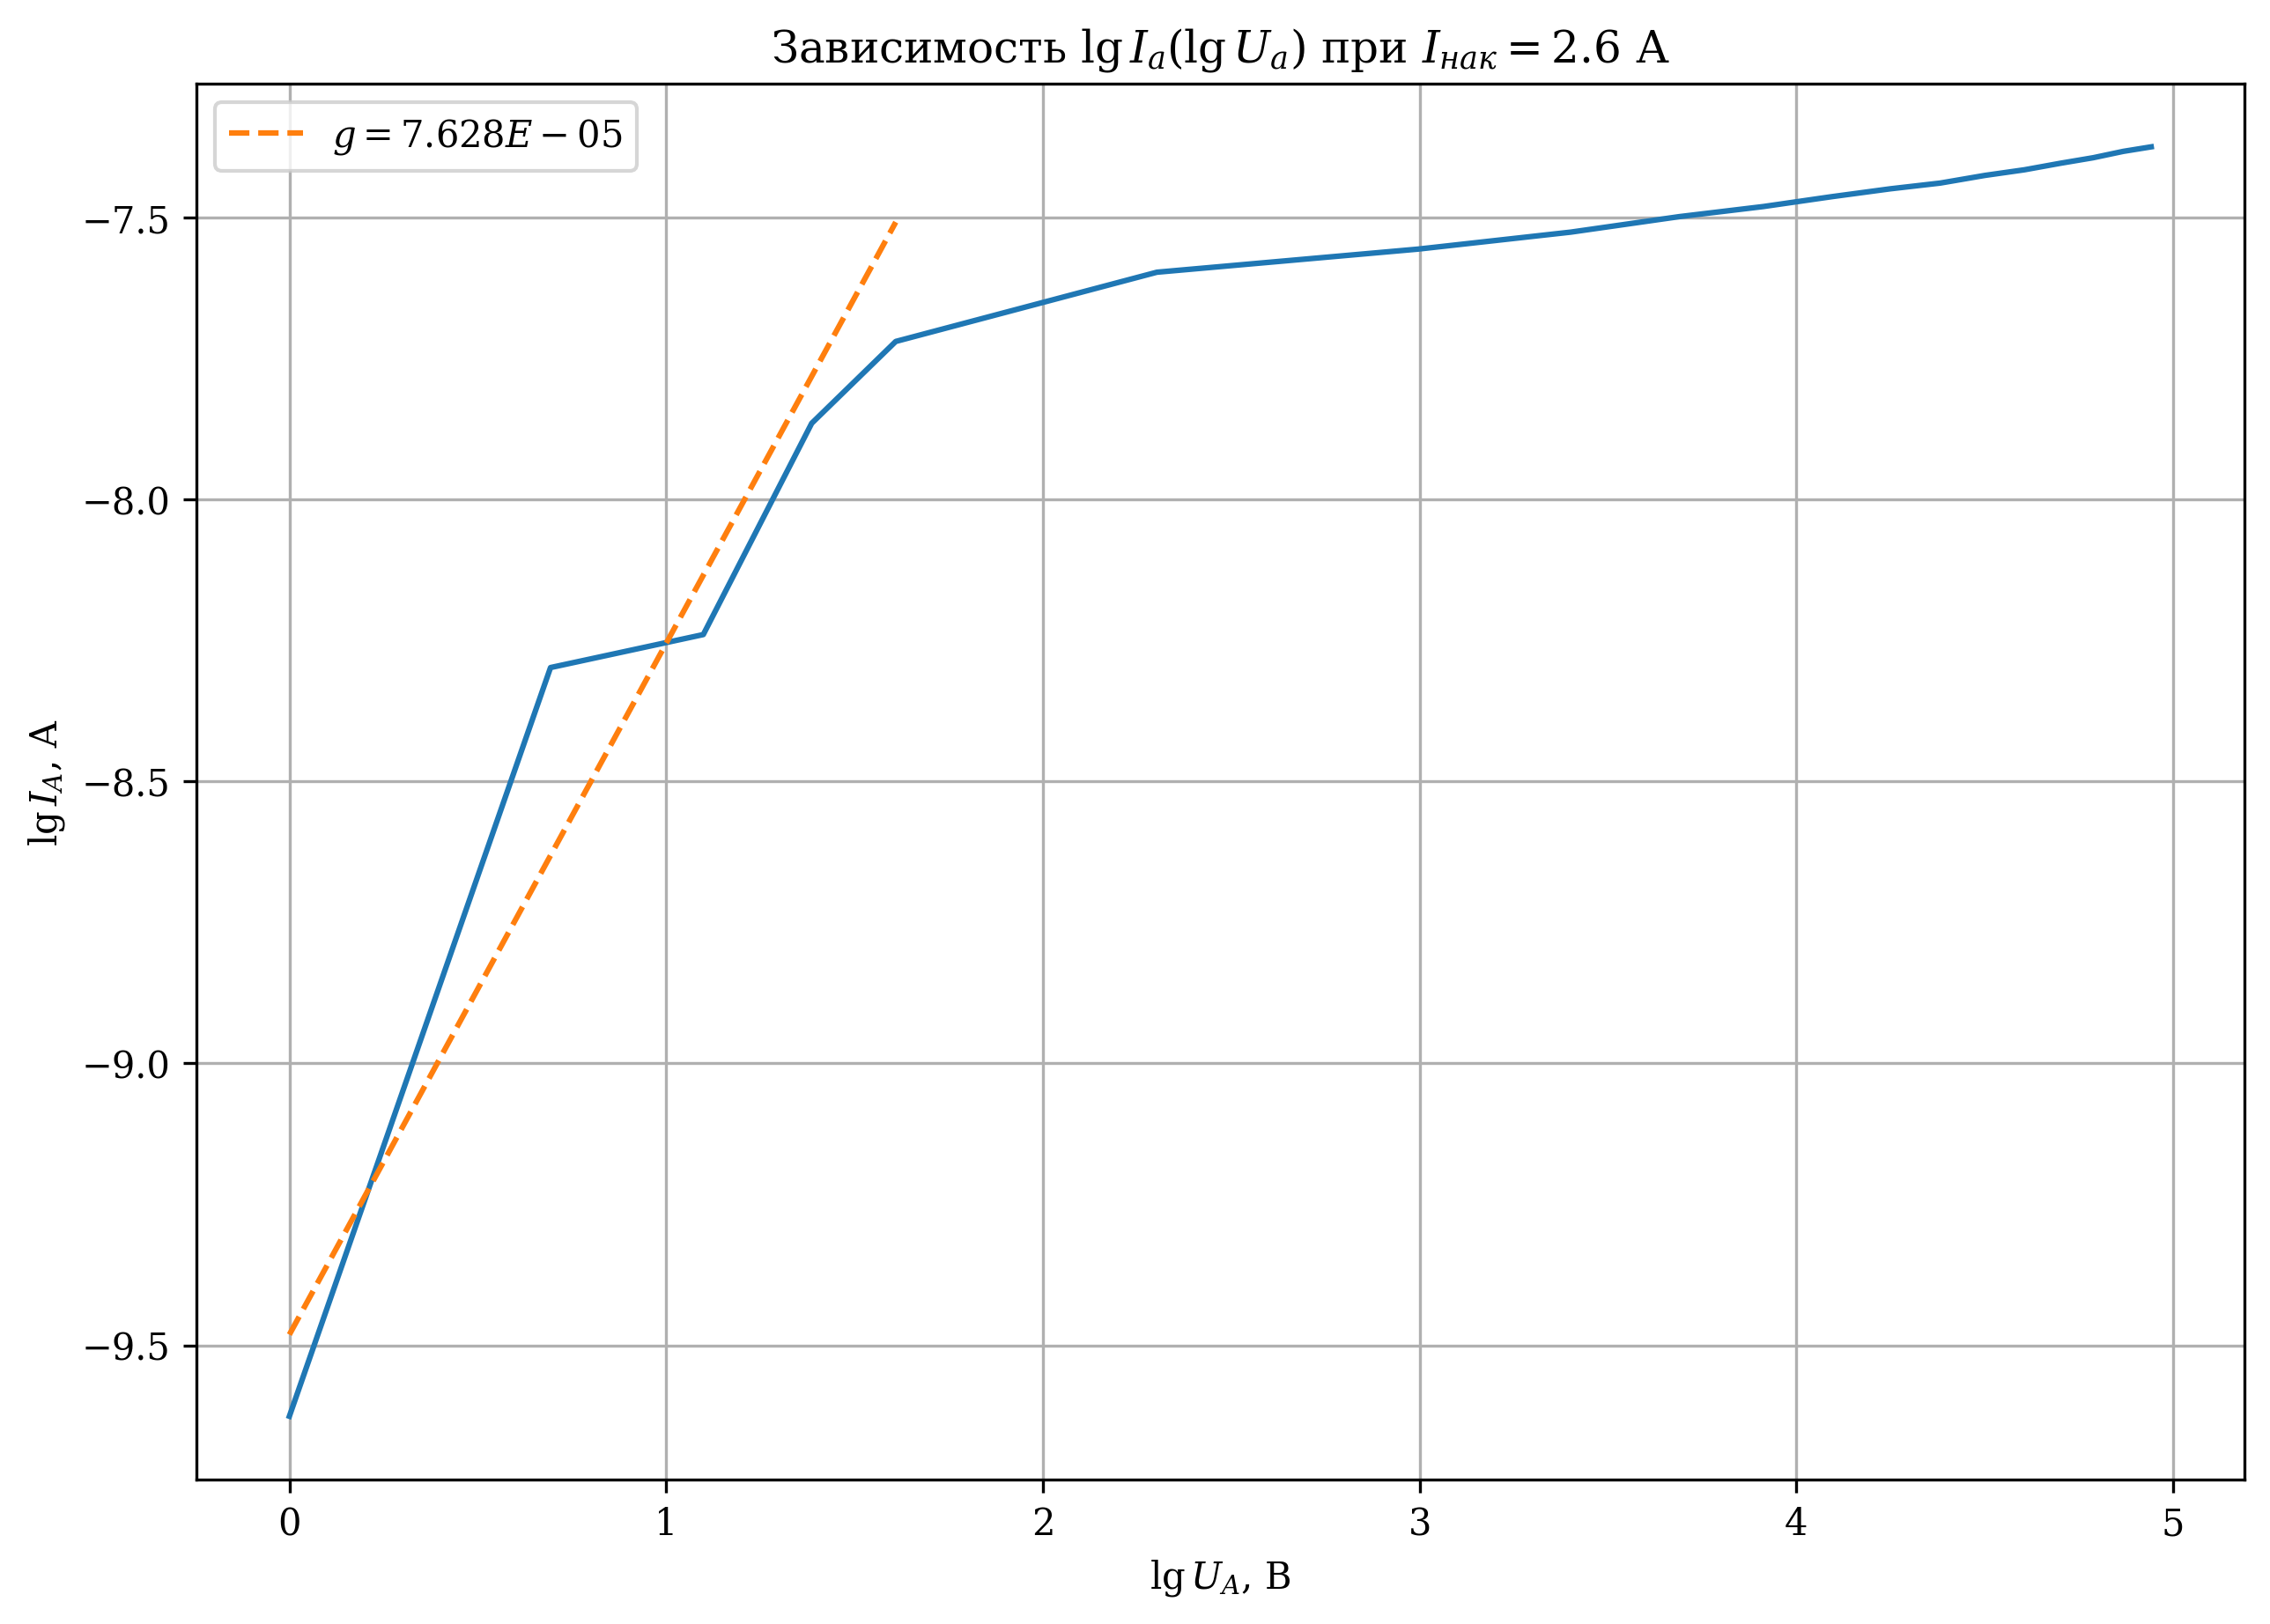

In [11]:
# I_nak = 2.6 U_nak = 4.33
plt.title(r"Зависимость $\lg I_a (\lg U_a)$ при $I_{нак} = 2.6$ А")
plt.ylabel(r"$\lgI_A$, А")
plt.xlabel(r"$\lgU_A$, В")

f, arg = lsf(np.log(diod3.iloc[:4, 0]), np.log(diod3.iloc[:4, 1]))

plt.plot(np.log(diod3.iloc[:, 0]), np.log(diod3.iloc[:, 1]))
plt.plot(np.log(diod3.iloc[:5, 0]), f(np.log(diod3.iloc[:5, 0])), ls='--', label="$g = {:.3E}$".format(np.exp(arg[1])))

plt.legend()
plt.savefig("26a.png")

x= 0.7945134575869863 y= -8.191996662765726
x2= 0.9023035076008973 y2= 67.53407078069384 xy= -6.171822869028826


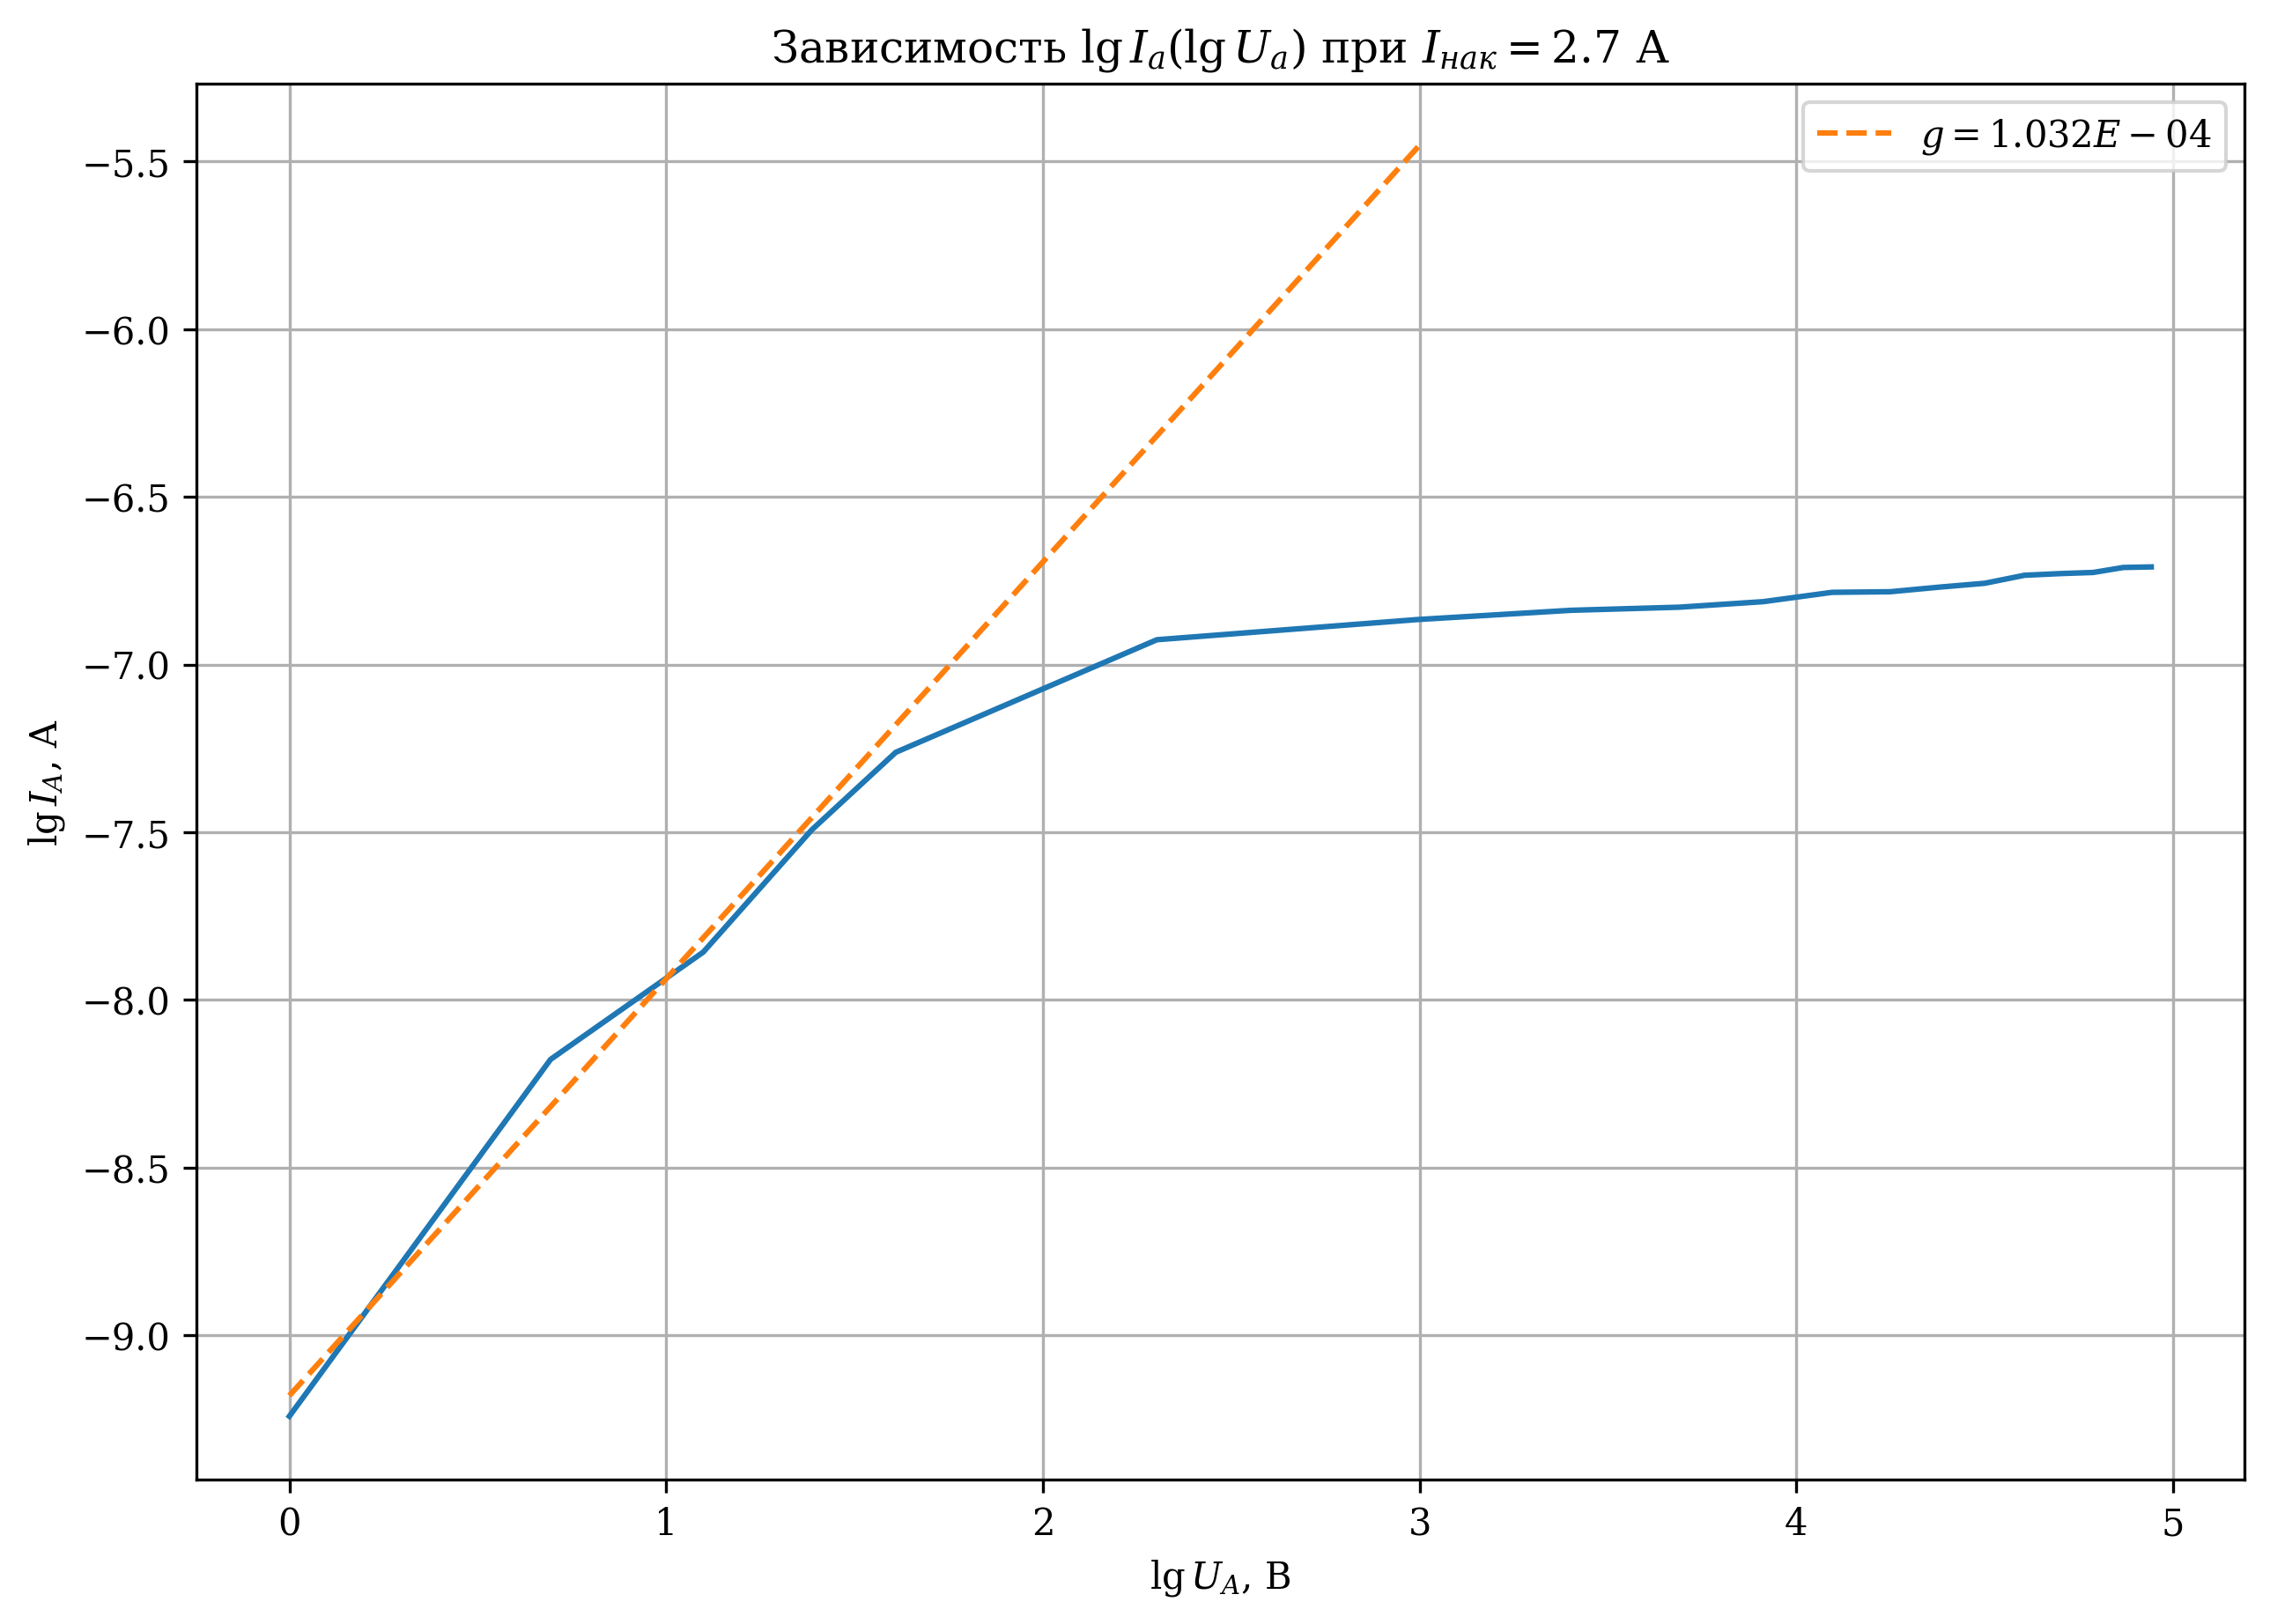

In [12]:
# I_nak = 2.7 U_nak = 4.73
plt.title(r"Зависимость $\lg I_a (\lg U_a)$ при $I_{нак} = 2.7$ А")
plt.ylabel(r"$\lgI_A$, А")
plt.xlabel(r"$\lgU_A$, В")

f, arg = lsf(np.log(diod4.iloc[:4, 0]), np.log(diod4.iloc[:4, 1]))

plt.plot(np.log(diod4.iloc[:, 0]), np.log(diod4.iloc[:, 1]))
plt.plot(np.log(diod4.iloc[:7, 0]), f(np.log(diod4.iloc[:7, 0])), ls='--', label="$g = {:.3E}$".format(np.exp(arg[1])))

plt.legend()
plt.savefig("27a.png")

x= 1.1816794726293487 y= -7.599432251525972
x2= 1.9169004224770372 y2= 58.68878190199204 xy= -8.28387395971329


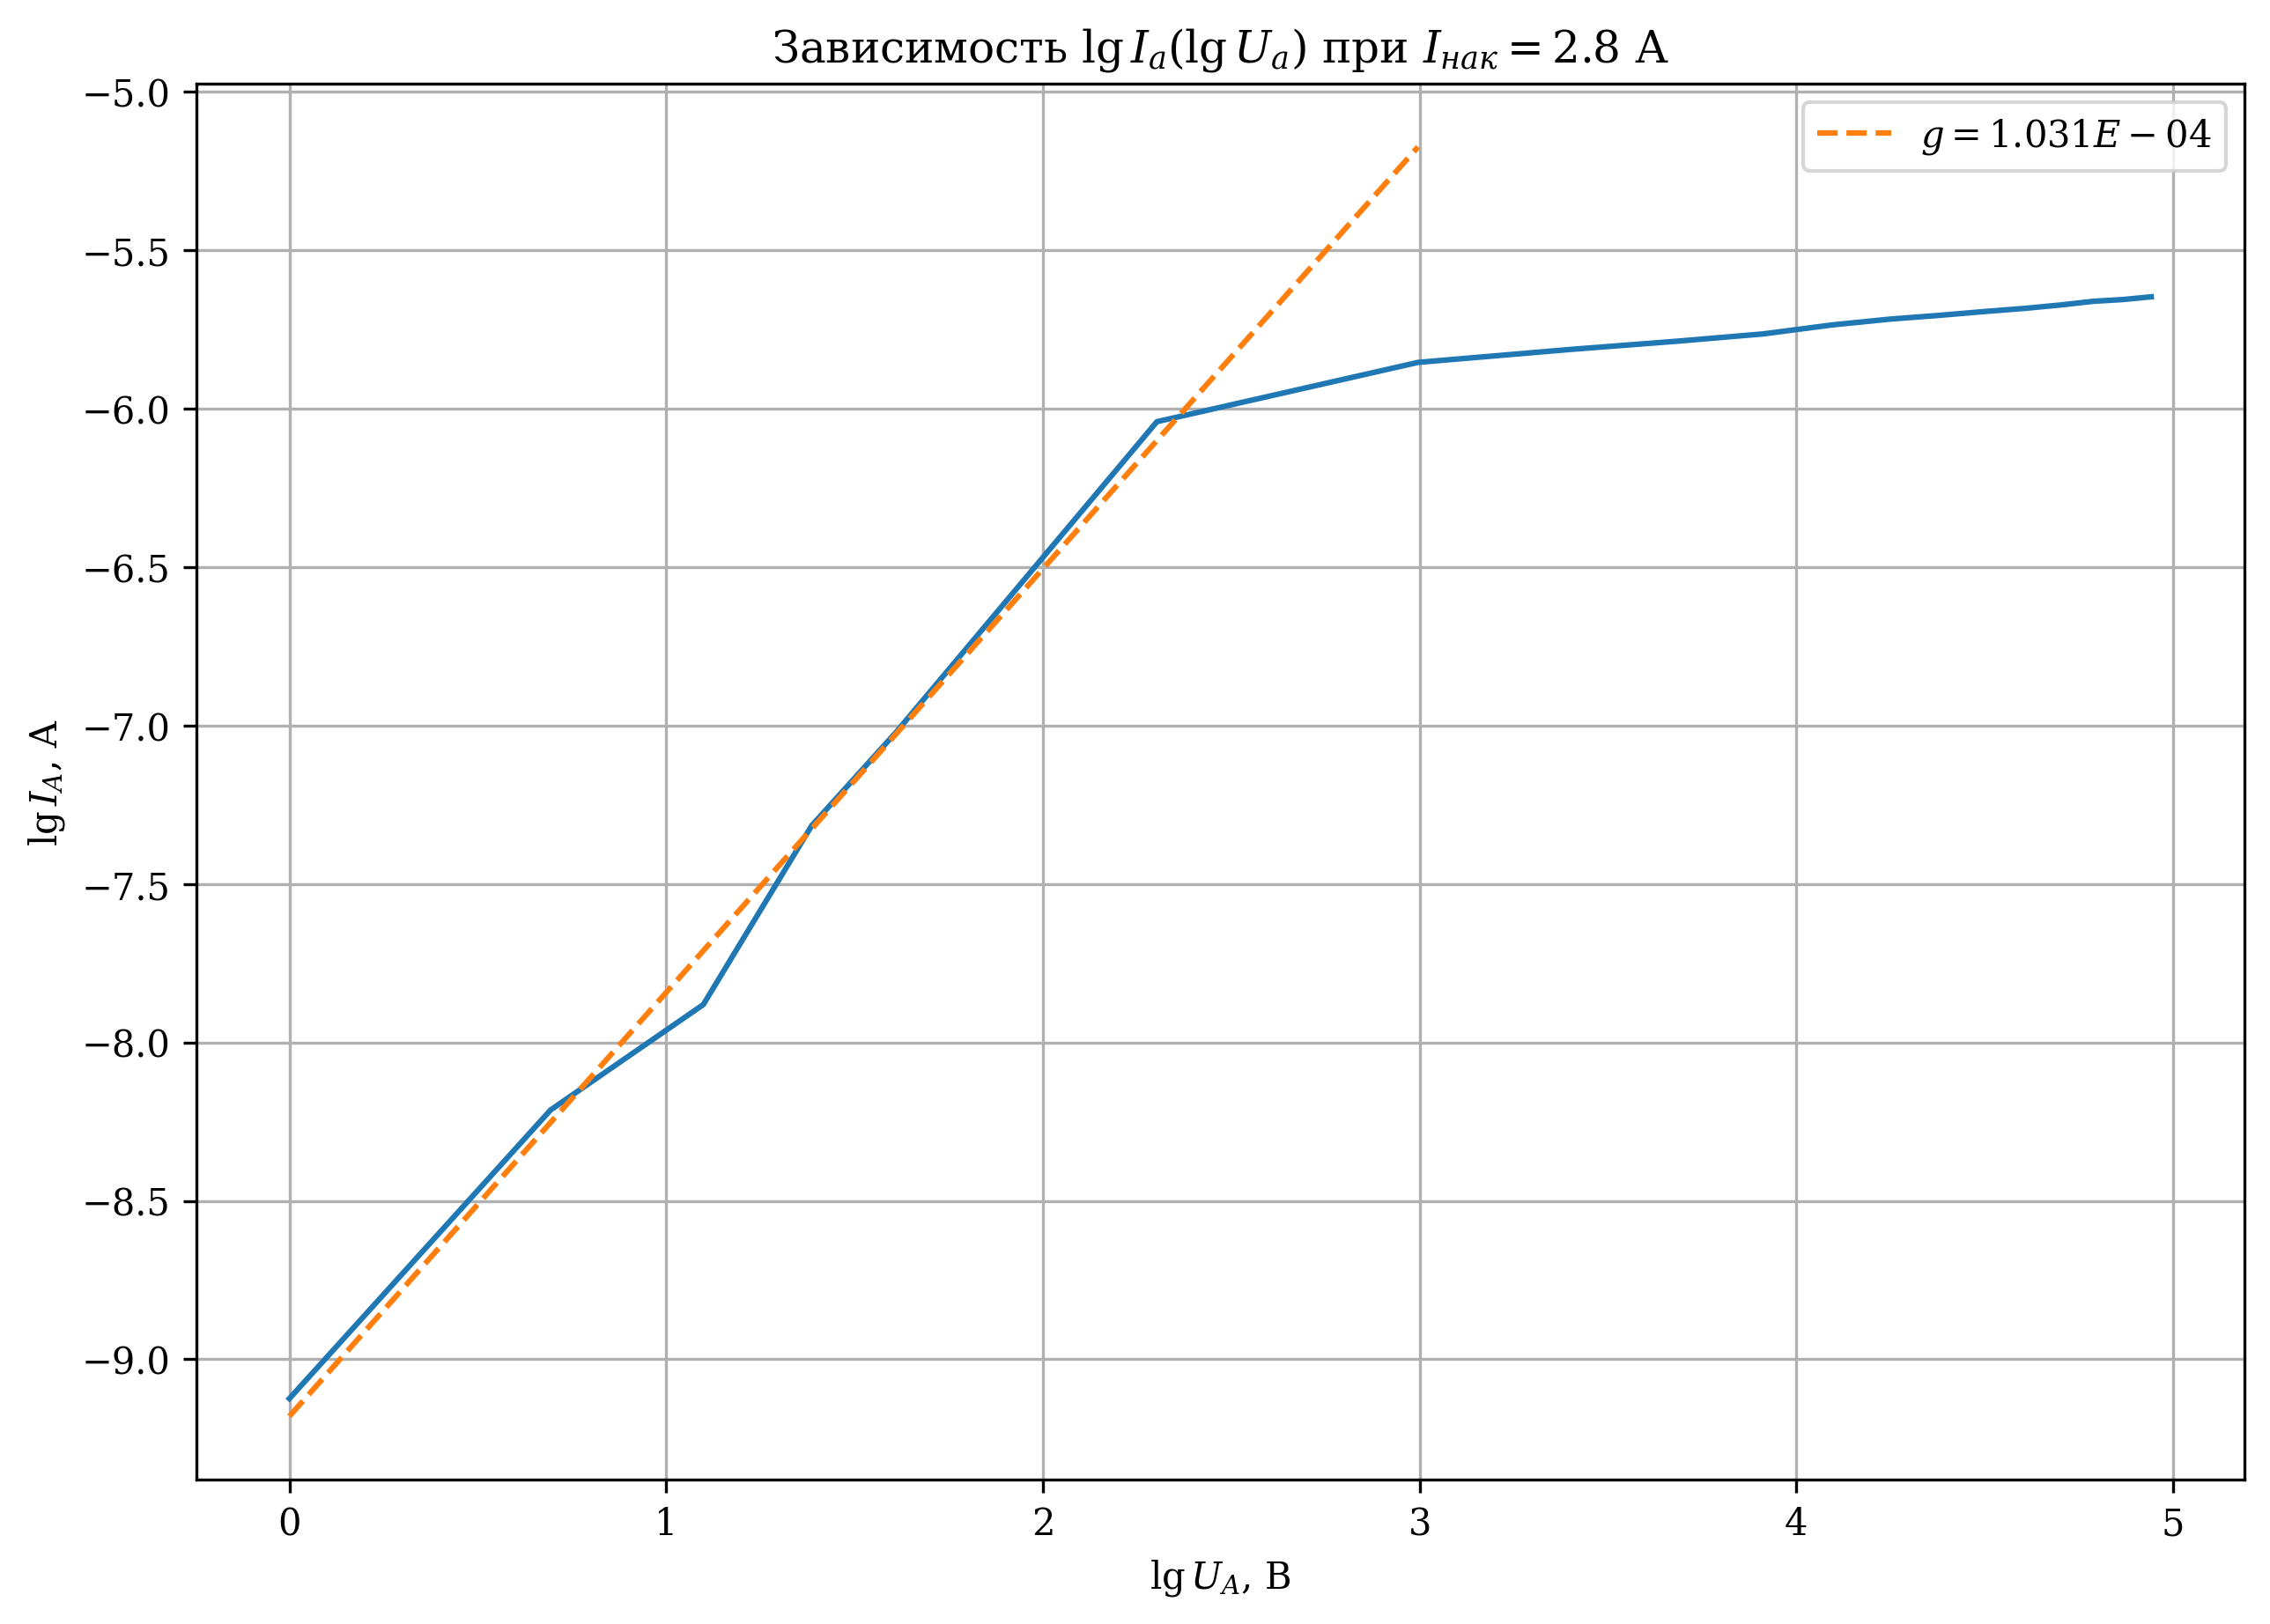

In [13]:
# I_nak = 2.8 U_nak = 4.73
plt.title(r"Зависимость $\lg I_a (\lg U_a)$ при $I_{нак} = 2.8$ А")
plt.ylabel(r"$\lgI_A$, А")
plt.xlabel(r"$\lgU_A$, В")

f, arg = lsf(np.log(diod5.iloc[:6, 0]), np.log(diod5.iloc[:6, 1]))

plt.plot(np.log(diod5.iloc[:, 0]), np.log(diod5.iloc[:, 1]))
plt.plot(np.log(diod5.iloc[:7, 0]), f(np.log(diod5.iloc[:7, 0])), ls='--', label="$g = {:.3E}$".format(np.exp(arg[1])))

plt.legend()
plt.savefig("28a.png")

x= 1.4408298727614404 y= -7.157980030899357
x2= 2.9251163413821692 y2= 52.72645494451762 xy= -9.191574971259914


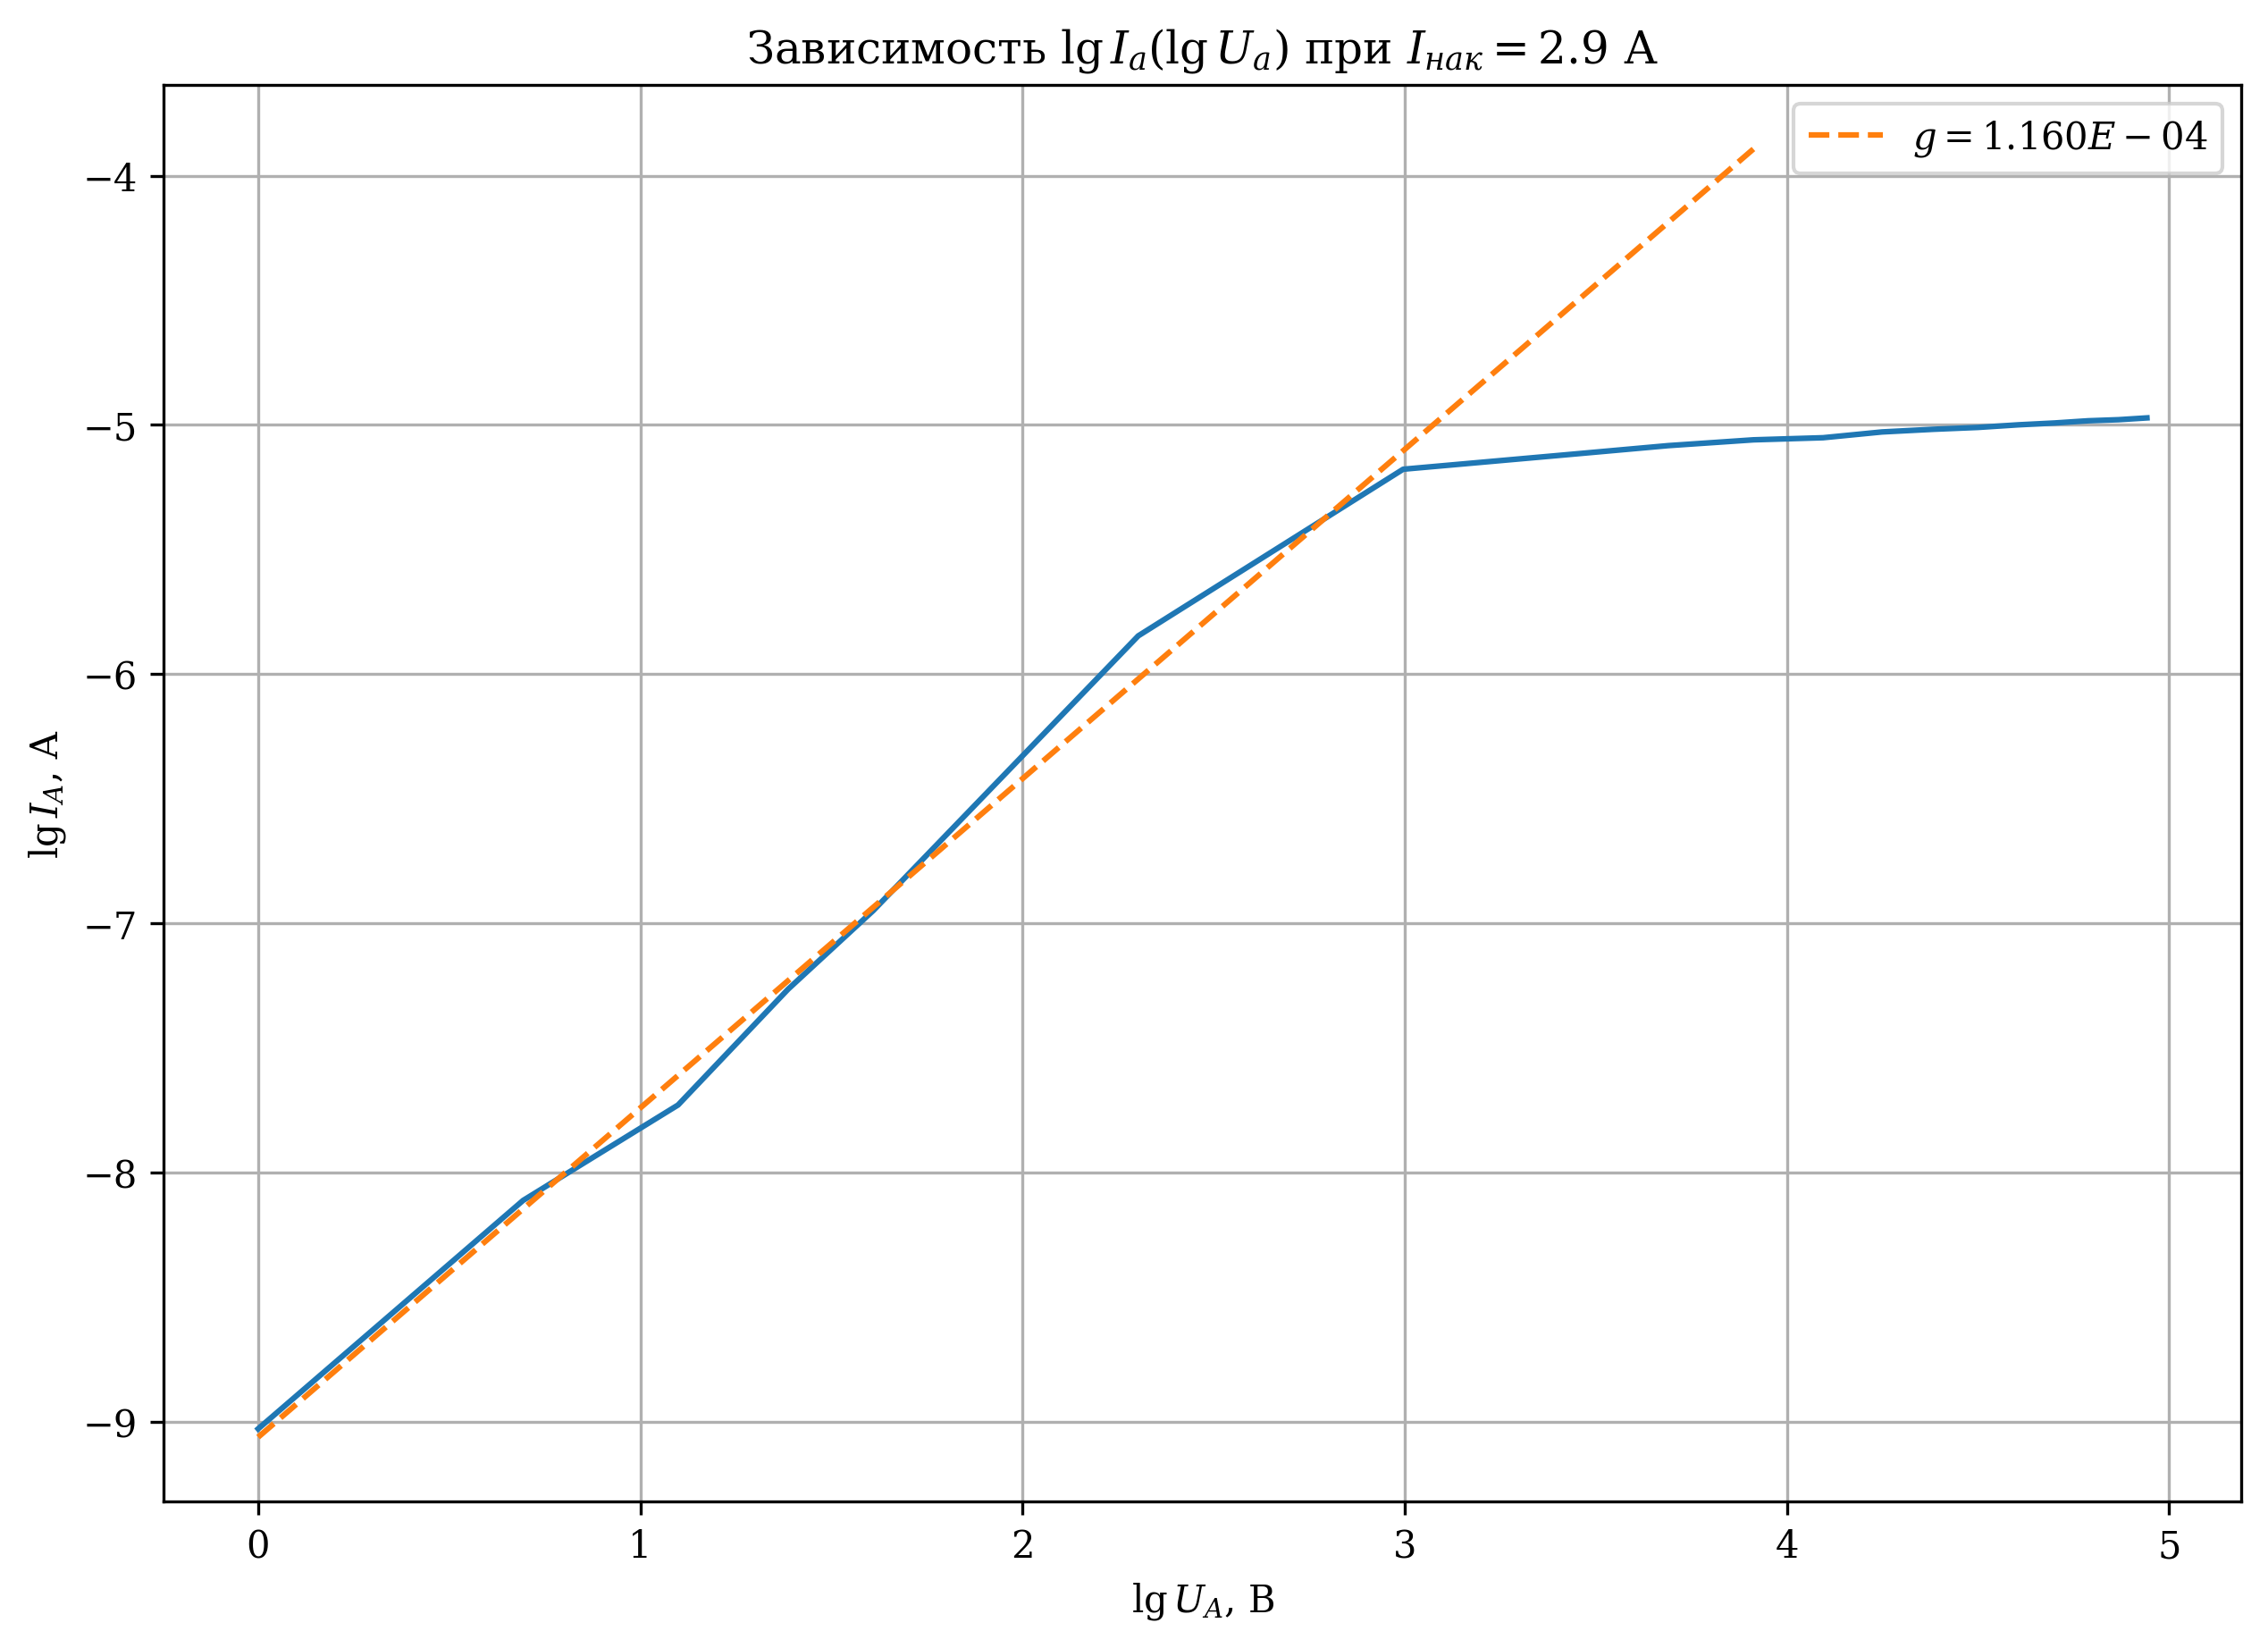

In [16]:
# I_nak = 2.9 U_nak = 4.73
plt.title(r"Зависимость $\lg I_a (\lg U_a)$ при $I_{нак} = 2.9$ А")
plt.ylabel(r"$\lgI_A$, А")
plt.xlabel(r"$\lgU_A$, В")

f, arg = lsf(np.log(diod6.iloc[:7, 0]), np.log(diod6.iloc[:7, 1]))

plt.plot(np.log(diod6.iloc[:, 0]), np.log(diod6.iloc[:, 1]))
plt.plot(np.log(diod6.iloc[:10, 0]), f(np.log(diod6.iloc[:10, 0])), ls='--', label="$g = {:.3E}$".format(np.exp(arg[1])))

plt.legend()
plt.savefig("29a.png")

x= 1.6858758113740298 y= -6.774972100770374
x2= 4.005494752337587 y2= 48.312501161259284 xy= -9.749463283695093


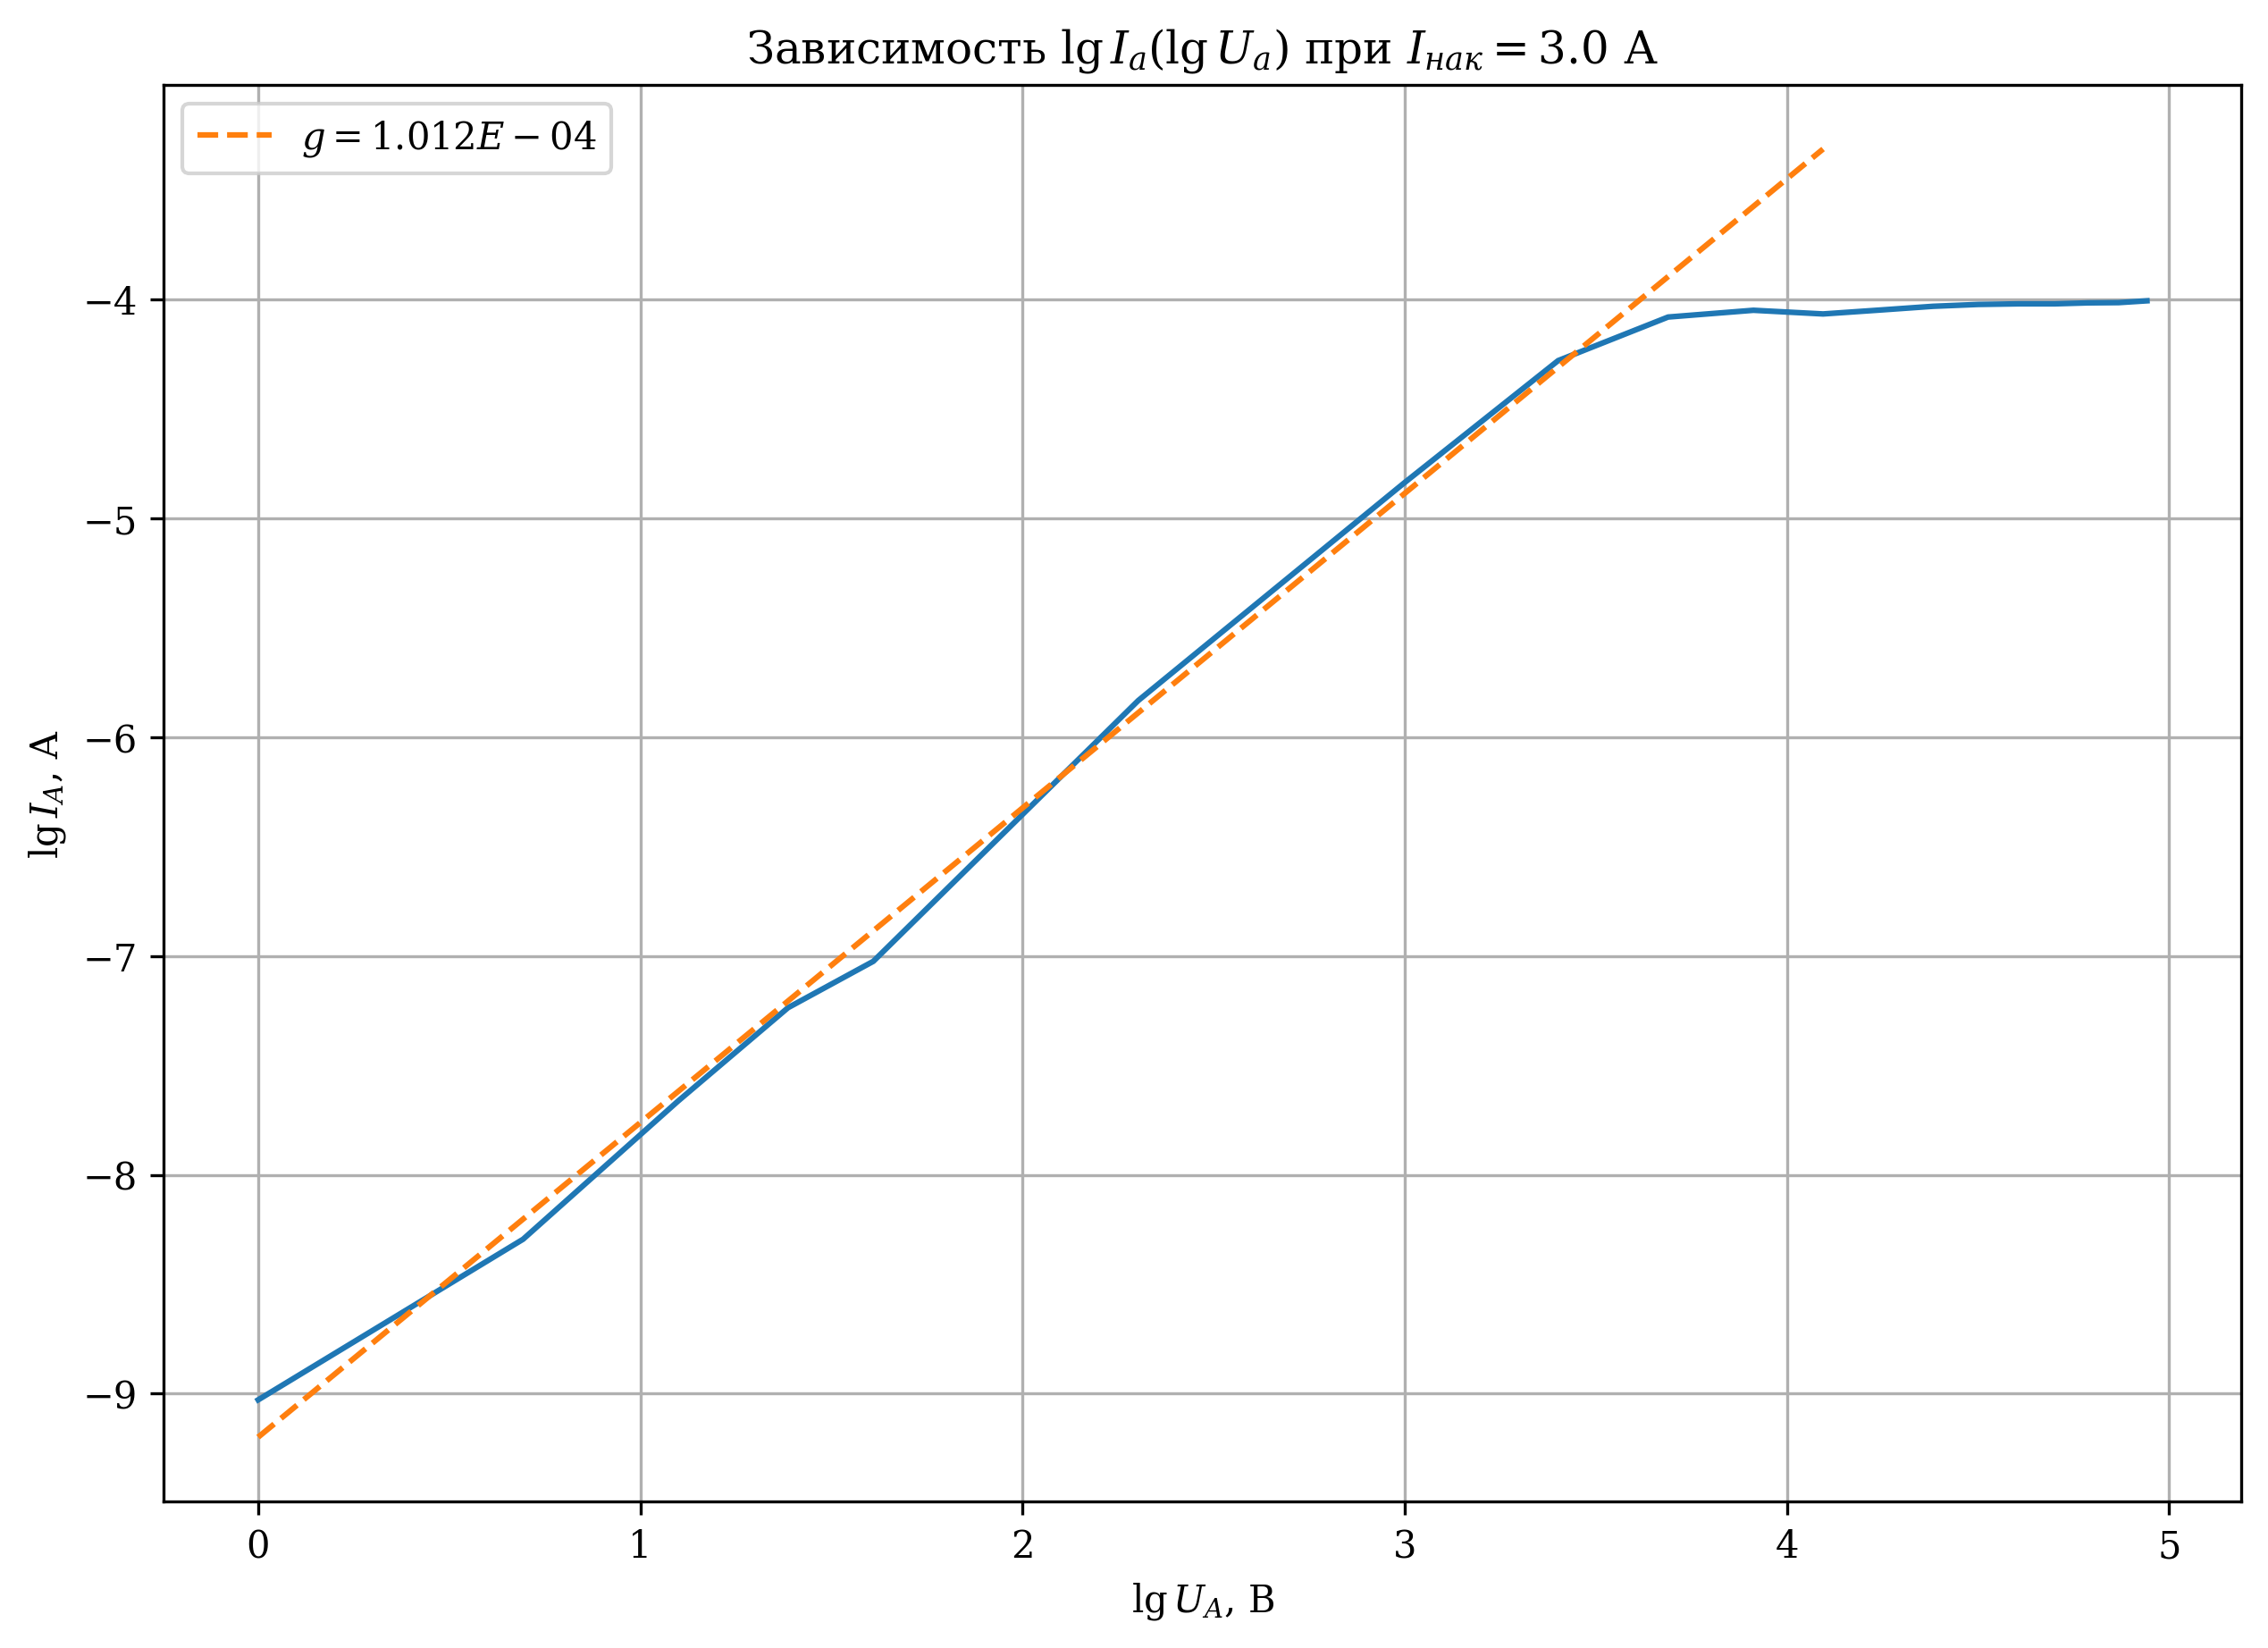

In [17]:
# I_nak = 3.0 U_nak = 4.73
plt.title(r"Зависимость $\lg I_a (\lg U_a)$ при $I_{нак} = 3.0$ А")
plt.ylabel(r"$\lgI_A$, А")
plt.xlabel(r"$\lgU_A$, В")

f, arg = lsf(np.log(diod7.iloc[:8, 0]), np.log(diod7.iloc[:8, 1]))

plt.plot(np.log(diod7.iloc[:, 0]), np.log(diod7.iloc[:, 1]))
plt.plot(np.log(diod7.iloc[:11, 0]), f(np.log(diod7.iloc[:11, 0])), ls='--', label="$g = {:.3E}$".format(np.exp(arg[1])))

plt.legend()
plt.savefig("30a.png")

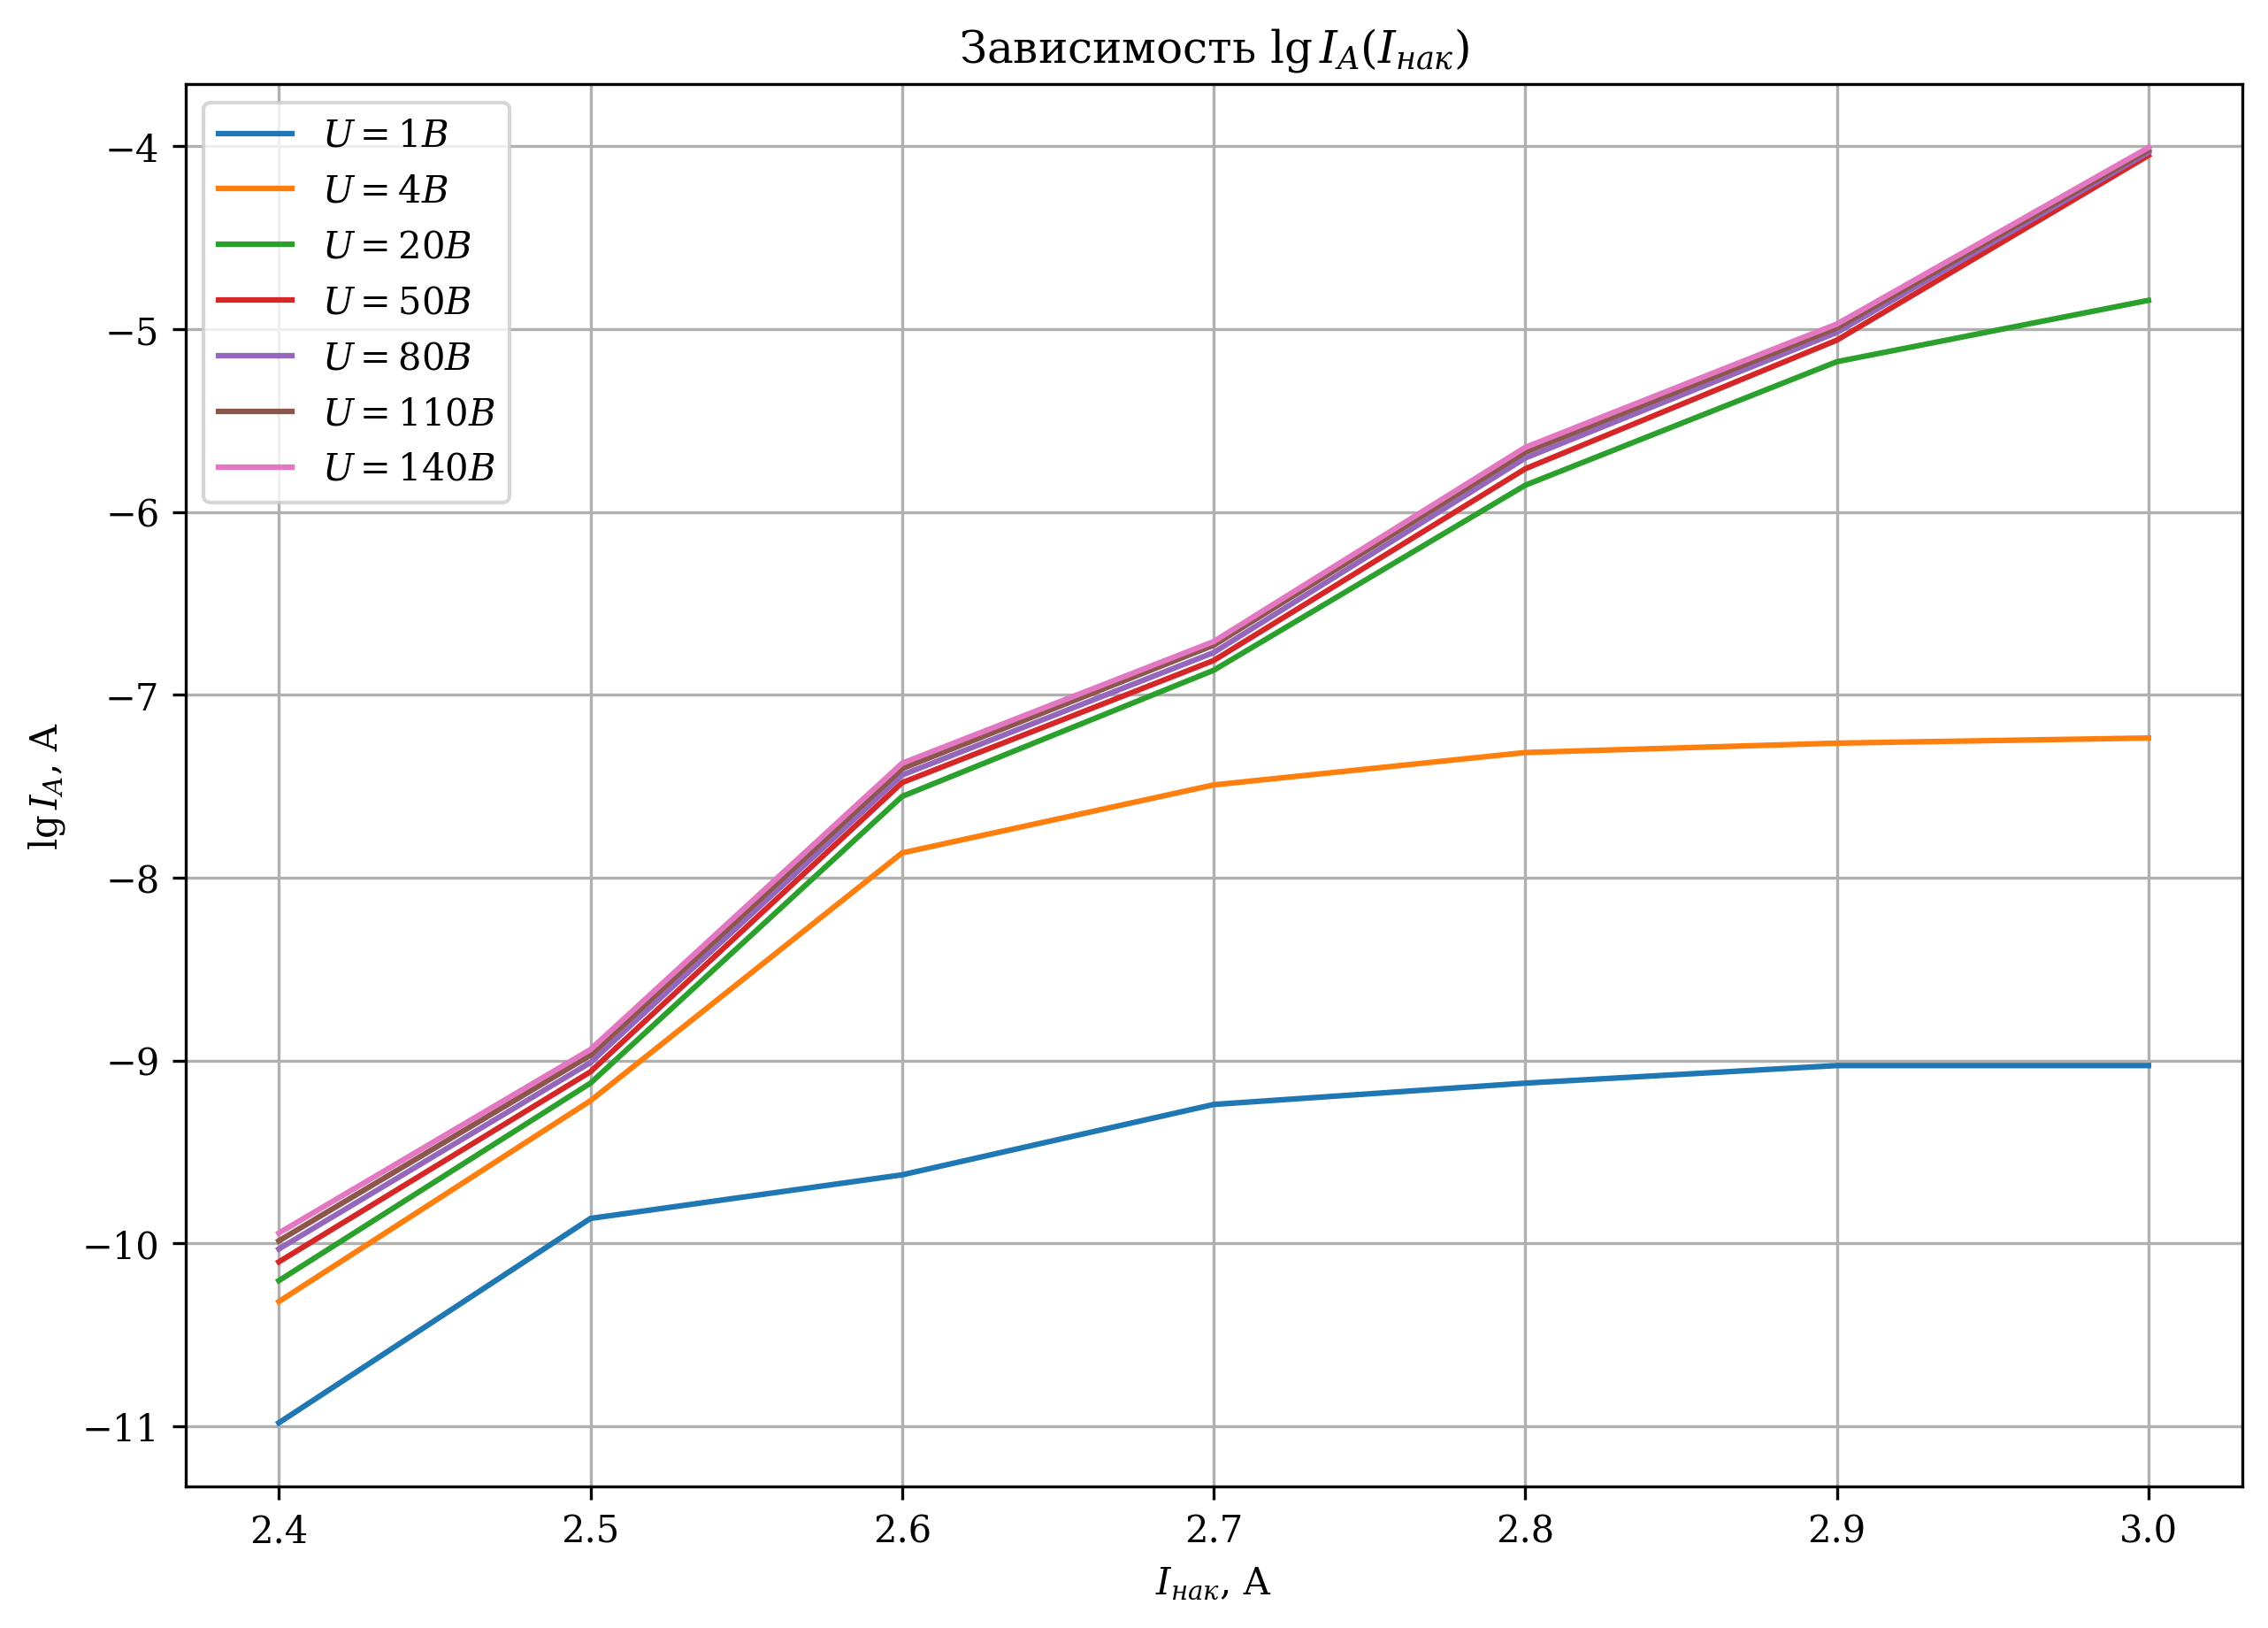

In [60]:
plt.title(r"Зависимость $\lg I_A (I_{нак})$")
plt.ylabel(r"$\lg I_A$, А")
plt.xlabel(r"$I_{нак}$, А")

for i in range(0, 19, 3):

    plt.plot([2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0], [np.log(diod1.iloc[i, 1]), np.log(diod2.iloc[i, 1]), np.log(diod3.iloc[i, 1]), np.log(diod4.iloc[i, 1]), 
                np.log(diod5.iloc[i, 1]), np.log(diod6.iloc[i, 1]), np.log(diod7.iloc[i, 1])], label="$U = {} В$".format(diod1.iloc[i, 0]))

plt.legend()
plt.savefig("iainak.png")

## --

Рассчитаем первеанс по формуле

$$ g = 1.467 \cdot 10^{-5} \frac{l_A}{r_A} = 1.467 \cdot 10^{-5} \frac{40}{0.15} =  $$